# Global Terrorism Task

## By: Ahmed Eraki
## Mail : ahmedmohamed9667@gmail.com

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
# How to check the encoding type of dataset

import chardet
file = 'E:\The Sparks Foundation\globalterrorismdb_0718dist.csv'
with open( file , 'rb') as rawdata:
    result = chardet.detect(rawdata.read(200000))
result

{'encoding': 'ISO-8859-1', 'confidence': 0.73, 'language': ''}

In [3]:
gt = pd.read_csv('E:\The Sparks Foundation\globalterrorismdb_0718dist.csv',
               encoding = 'ISO-8859-1' )
gt

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181686,201712310022,2017,12,31,NaN,0,NaN,182,Somalia,11,...,NaN,"""Somalia: Al-Shabaab Militants Attack Army Che...","""Highlights: Somalia Daily Media Highlights 2 ...","""Highlights: Somalia Daily Media Highlights 1 ...",START Primary Collection,0,0,0,0,NaN
181687,201712310029,2017,12,31,NaN,0,NaN,200,Syria,10,...,NaN,"""Putin's 'victory' in Syria has turned into a ...","""Two Russian soldiers killed at Hmeymim base i...","""Two Russian servicemen killed in Syria mortar...",START Primary Collection,-9,-9,1,1,NaN
181688,201712310030,2017,12,31,NaN,0,NaN,160,Philippines,5,...,NaN,"""Maguindanao clashes trap tribe members,"" Phil...",NaN,NaN,START Primary Collection,0,0,0,0,NaN
181689,201712310031,2017,12,31,NaN,0,NaN,92,India,6,...,NaN,"""Trader escapes grenade attack in Imphal,"" Bus...",NaN,NaN,START Primary Collection,-9,-9,0,-9,NaN


In [4]:
type_of_column = []
for i in gt.dtypes:
    type_of_column.append(i)
    
column = []
for j in gt.columns:
    column.append(j)


In [5]:
len(type_of_column)

135

In [6]:
len(column)

135

In [7]:
# Here we show the type and the name of each column

s1 = pd.Series(type_of_column, name ='type of column')
s2 = pd.Series(column , name='column')

info = pd.concat([s1,s2],axis=1)
info

,type of column,column
0,int64,eventid
1,int64,iyear
2,int64,imonth
3,int64,iday
4,object,approxdate
...,...,...
130,int64,INT_LOG
131,int64,INT_IDEO
132,int64,INT_MISC
133,int64,INT_ANY


In [8]:
gt.isnull().sum()

eventid            0
iyear              0
imonth             0
iday               0
approxdate    172452
               ...  
INT_LOG            0
INT_IDEO           0
INT_MISC           0
INT_ANY            0
related       156653
Length: 135, dtype: int64

In [9]:
missing_values = gt.isnull().sum().sort_values(ascending = False)
percentage_of_missing =(missing_values / len(gt)) *100
print(pd.concat([missing_values , percentage_of_missing] , axis=1 , keys=['missing_values' , '% missing data']))

                  missing_values  % missing data
gsubname3                 181671       99.988992
weapsubtype4_txt          181621       99.961473
weapsubtype4              181621       99.961473
weaptype4                 181618       99.959822
weaptype4_txt             181618       99.959822
...                          ...             ...
suicide                        0        0.000000
success                        0        0.000000
crit3                          0        0.000000
property                       0        0.000000
eventid                        0        0.000000

[135 rows x 2 columns]


as we notice the dataset contains columns that have nan values in its whole rows so we will drop them as no need for them

In [10]:
# we will drop columns with percentage of missing vales upper than 50 %

for i in gt.columns:
    if gt[i].isnull().sum() / len(gt) >=0.5 :
        gt.drop(i , axis = 1 , inplace= True)

In [11]:
# now let us check the shape of dataset

gt.shape

(181691, 58)

In [12]:
gt.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'extended', 'country',
       'country_txt', 'region', 'region_txt', 'provstate', 'city', 'latitude',
       'longitude', 'specificity', 'vicinity', 'summary', 'crit1', 'crit2',
       'crit3', 'doubtterr', 'multiple', 'success', 'suicide', 'attacktype1',
       'attacktype1_txt', 'targtype1', 'targtype1_txt', 'targsubtype1',
       'targsubtype1_txt', 'corp1', 'target1', 'natlty1', 'natlty1_txt',
       'gname', 'guncertain1', 'individual', 'nperps', 'nperpcap', 'claimed',
       'weaptype1', 'weaptype1_txt', 'weapsubtype1', 'weapsubtype1_txt',
       'weapdetail', 'nkill', 'nkillus', 'nkillter', 'nwound', 'nwoundus',
       'nwoundte', 'property', 'ishostkid', 'scite1', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY'],
      dtype='object')

In [13]:
gt.isnull().sum()

eventid                 0
iyear                   0
imonth                  0
iday                    0
extended                0
country                 0
country_txt             0
region                  0
region_txt              0
provstate             421
city                  434
latitude             4556
longitude            4557
specificity             6
vicinity                0
summary             66129
crit1                   0
crit2                   0
crit3                   0
doubtterr               1
multiple                1
success                 0
suicide                 0
attacktype1             0
attacktype1_txt         0
targtype1               0
targtype1_txt           0
targsubtype1        10373
targsubtype1_txt    10373
corp1               42550
target1               636
natlty1              1559
natlty1_txt          1559
gname                   0
guncertain1           380
individual              0
nperps              71115
nperpcap            69489
claimed     

From above we see many repeated unuseful columns that do not give us useful or completed data insights so we will choose columns we need to extract insights from them in a new dataset

In [14]:
df = gt[["iyear","imonth","iday","country_txt","region_txt","provstate","city",
         "attacktype1_txt","targtype1_txt","gname",
         "weaptype1_txt","nkill","nkillus","nkillter","nwound","nwoundus","nwoundte","extended","ishostkid","claimed"]]

In [15]:
df

,iyear,imonth,iday,country_txt,region_txt,provstate,city,attacktype1_txt,targtype1_txt,gname,weaptype1_txt,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,extended,ishostkid,claimed
0,1970,7,2,Dominican Republic,Central America & Caribbean,NaN,Santo Domingo,Assassination,Private Citizens & Property,MANO-D,Unknown,1.0,NaN,NaN,0.0,NaN,NaN,0,0.0,NaN
1,1970,0,0,Mexico,North America,Federal,Mexico city,Hostage Taking (Kidnapping),Government (Diplomatic),23rd of September Communist League,Unknown,0.0,NaN,NaN,0.0,NaN,NaN,0,1.0,NaN
2,1970,1,0,Philippines,Southeast Asia,Tarlac,Unknown,Assassination,Journalists & Media,Unknown,Unknown,1.0,NaN,NaN,0.0,NaN,NaN,0,0.0,NaN
3,1970,1,0,Greece,Western Europe,Attica,Athens,Bombing/Explosion,Government (Diplomatic),Unknown,Explosives,NaN,NaN,NaN,NaN,NaN,NaN,0,0.0,NaN
4,1970,1,0,Japan,East Asia,Fukouka,Fukouka,Facility/Infrastructure Attack,Government (Diplomatic),Unknown,Incendiary,NaN,NaN,NaN,NaN,NaN,NaN,0,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181686,2017,12,31,Somalia,Sub-Saharan Africa,Middle Shebelle,Ceelka Geelow,Armed Assault,Military,Al-Shabaab,Firearms,1.0,0.0,0.0,2.0,0.0,0.0,0,0.0,1.0
181687,2017,12,31,Syria,Middle East & North Africa,Lattakia,Jableh,Bombing/Explosion,Military,Muslim extremists,Explosives,2.0,0.0,0.0,7.0,0.0,0.0,0,0.0,0.0
181688,2017,12,31,Philippines,Southeast Asia,Maguindanao,Kubentog,Facility/Infrastructure Attack,Private Citizens & Property,Bangsamoro Islamic Freedom Movement (BIFM),Incendiary,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0
181689,2017,12,31,India,South Asia,Manipur,Imphal,Bombing/Explosion,Government (General),Unknown,Explosives,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0


In [16]:
df.isnull().sum()

iyear                  0
imonth                 0
iday                   0
country_txt            0
region_txt             0
provstate            421
city                 434
attacktype1_txt        0
targtype1_txt          0
gname                  0
weaptype1_txt          0
nkill              10313
nkillus            64446
nkillter           66958
nwound             16311
nwoundus           64702
nwoundte           69143
extended               0
ishostkid            178
claimed            66120
dtype: int64

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 20 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   iyear            181691 non-null  int64  
 1   imonth           181691 non-null  int64  
 2   iday             181691 non-null  int64  
 3   country_txt      181691 non-null  object 
 4   region_txt       181691 non-null  object 
 5   provstate        181270 non-null  object 
 6   city             181257 non-null  object 
 7   attacktype1_txt  181691 non-null  object 
 8   targtype1_txt    181691 non-null  object 
 9   gname            181691 non-null  object 
 10  weaptype1_txt    181691 non-null  object 
 11  nkill            171378 non-null  float64
 12  nkillus          117245 non-null  float64
 13  nkillter         114733 non-null  float64
 14  nwound           165380 non-null  float64
 15  nwoundus         116989 non-null  float64
 16  nwoundte         112548 non-null  floa

columns city and provstate contain nan object values so we will relace them to have a clean dataset

In [18]:
df['city'] = df['city'].fillna('not detected')
df['provstate'] = df['provstate'].fillna('not detected')

In [19]:
# replace nan values with 0 for integers
df.fillna(0 , inplace = True)

There are no null values in our new data

In [20]:
df.isnull().sum()

iyear              0
imonth             0
iday               0
country_txt        0
region_txt         0
provstate          0
city               0
attacktype1_txt    0
targtype1_txt      0
gname              0
weaptype1_txt      0
nkill              0
nkillus            0
nkillter           0
nwound             0
nwoundus           0
nwoundte           0
extended           0
ishostkid          0
claimed            0
dtype: int64

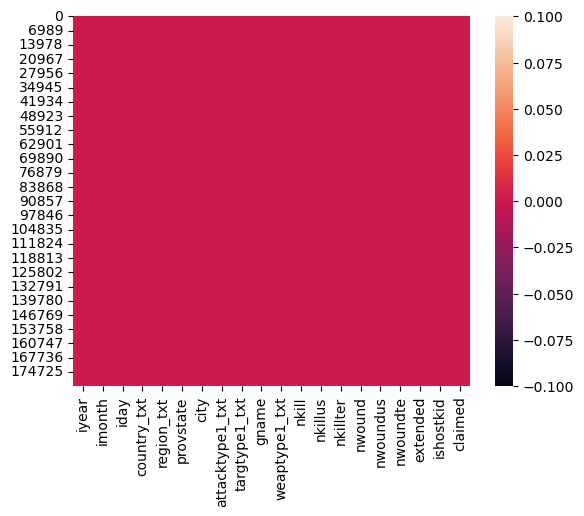

In [21]:
sns.heatmap(df.isnull())
plt.show()

Our data is clean and has no null values

In [22]:
df.columns

Index(['iyear', 'imonth', 'iday', 'country_txt', 'region_txt', 'provstate',
       'city', 'attacktype1_txt', 'targtype1_txt', 'gname', 'weaptype1_txt',
       'nkill', 'nkillus', 'nkillter', 'nwound', 'nwoundus', 'nwoundte',
       'extended', 'ishostkid', 'claimed'],
      dtype='object')

In [23]:
# let us calculate total number of killing crimes
df["KILLED"] = df[['nkill', 'nkillus', 'nkillter']].sum(axis=1)
df.drop(['nkill', 'nkillus', 'nkillter'] ,axis = 1 , inplace = True)

#let us calculate total number of wounded incidents
df["WOUNDED"] = df[['nwound', 'nwoundus', 'nwoundte']].sum(axis = 1)
df.drop(['nwound', 'nwoundus', 'nwoundte'] ,axis=1 , inplace = True)

In [24]:
df['CASUALTIES OF CRIMES'] = df["KILLED"] + df["WOUNDED"] 

In [25]:
df

,iyear,imonth,iday,country_txt,region_txt,provstate,city,attacktype1_txt,targtype1_txt,gname,weaptype1_txt,extended,ishostkid,claimed,KILLED,WOUNDED,CASUALTIES OF CRIMES
0,1970,7,2,Dominican Republic,Central America & Caribbean,not detected,Santo Domingo,Assassination,Private Citizens & Property,MANO-D,Unknown,0,0.0,0.0,1.0,0.0,1.0
1,1970,0,0,Mexico,North America,Federal,Mexico city,Hostage Taking (Kidnapping),Government (Diplomatic),23rd of September Communist League,Unknown,0,1.0,0.0,0.0,0.0,0.0
2,1970,1,0,Philippines,Southeast Asia,Tarlac,Unknown,Assassination,Journalists & Media,Unknown,Unknown,0,0.0,0.0,1.0,0.0,1.0
3,1970,1,0,Greece,Western Europe,Attica,Athens,Bombing/Explosion,Government (Diplomatic),Unknown,Explosives,0,0.0,0.0,0.0,0.0,0.0
4,1970,1,0,Japan,East Asia,Fukouka,Fukouka,Facility/Infrastructure Attack,Government (Diplomatic),Unknown,Incendiary,0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181686,2017,12,31,Somalia,Sub-Saharan Africa,Middle Shebelle,Ceelka Geelow,Armed Assault,Military,Al-Shabaab,Firearms,0,0.0,1.0,1.0,2.0,3.0
181687,2017,12,31,Syria,Middle East & North Africa,Lattakia,Jableh,Bombing/Explosion,Military,Muslim extremists,Explosives,0,0.0,0.0,2.0,7.0,9.0
181688,2017,12,31,Philippines,Southeast Asia,Maguindanao,Kubentog,Facility/Infrastructure Attack,Private Citizens & Property,Bangsamoro Islamic Freedom Movement (BIFM),Incendiary,0,0.0,0.0,0.0,0.0,0.0
181689,2017,12,31,India,South Asia,Manipur,Imphal,Bombing/Explosion,Government (General),Unknown,Explosives,0,0.0,0.0,0.0,0.0,0.0


In [26]:
df.rename(columns={"iyear":"YEAR","imonth":"MONTH","iday":"DAY","country_txt":"COUNTRY","region_txt":"REGION",
                   "provstate":"STATE","city":"CITY",
                    "attacktype1_txt":"ATTACK TYPE","targtype1_txt":"TARGET TYPE","gname":"GNAME","weaptype1_txt":"WEAPON TYPE",
                   "targettype_txt":"TARGET TYPE",'extended':"EXTENDED" ,"ishostkid":"HOSTAGES KIDNAPED","claimed":"CLAIMED" },inplace=True)

In [27]:
df

,YEAR,MONTH,DAY,COUNTRY,REGION,STATE,CITY,ATTACK TYPE,TARGET TYPE,GNAME,WEAPON TYPE,EXTENDED,HOSTAGES KIDNAPED,CLAIMED,KILLED,WOUNDED,CASUALTIES OF CRIMES
0,1970,7,2,Dominican Republic,Central America & Caribbean,not detected,Santo Domingo,Assassination,Private Citizens & Property,MANO-D,Unknown,0,0.0,0.0,1.0,0.0,1.0
1,1970,0,0,Mexico,North America,Federal,Mexico city,Hostage Taking (Kidnapping),Government (Diplomatic),23rd of September Communist League,Unknown,0,1.0,0.0,0.0,0.0,0.0
2,1970,1,0,Philippines,Southeast Asia,Tarlac,Unknown,Assassination,Journalists & Media,Unknown,Unknown,0,0.0,0.0,1.0,0.0,1.0
3,1970,1,0,Greece,Western Europe,Attica,Athens,Bombing/Explosion,Government (Diplomatic),Unknown,Explosives,0,0.0,0.0,0.0,0.0,0.0
4,1970,1,0,Japan,East Asia,Fukouka,Fukouka,Facility/Infrastructure Attack,Government (Diplomatic),Unknown,Incendiary,0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181686,2017,12,31,Somalia,Sub-Saharan Africa,Middle Shebelle,Ceelka Geelow,Armed Assault,Military,Al-Shabaab,Firearms,0,0.0,1.0,1.0,2.0,3.0
181687,2017,12,31,Syria,Middle East & North Africa,Lattakia,Jableh,Bombing/Explosion,Military,Muslim extremists,Explosives,0,0.0,0.0,2.0,7.0,9.0
181688,2017,12,31,Philippines,Southeast Asia,Maguindanao,Kubentog,Facility/Infrastructure Attack,Private Citizens & Property,Bangsamoro Islamic Freedom Movement (BIFM),Incendiary,0,0.0,0.0,0.0,0.0,0.0
181689,2017,12,31,India,South Asia,Manipur,Imphal,Bombing/Explosion,Government (General),Unknown,Explosives,0,0.0,0.0,0.0,0.0,0.0


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 17 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   YEAR                  181691 non-null  int64  
 1   MONTH                 181691 non-null  int64  
 2   DAY                   181691 non-null  int64  
 3   COUNTRY               181691 non-null  object 
 4   REGION                181691 non-null  object 
 5   STATE                 181691 non-null  object 
 6   CITY                  181691 non-null  object 
 7   ATTACK TYPE           181691 non-null  object 
 8   TARGET TYPE           181691 non-null  object 
 9   GNAME                 181691 non-null  object 
 10  WEAPON TYPE           181691 non-null  object 
 11  EXTENDED              181691 non-null  int64  
 12  HOSTAGES KIDNAPED     181691 non-null  float64
 13  CLAIMED               181691 non-null  float64
 14  KILLED                181691 non-null  float64
 15  

### Now our dataset is ready and clean for analysis 

# Exploaratory Data Analysis

## Year 

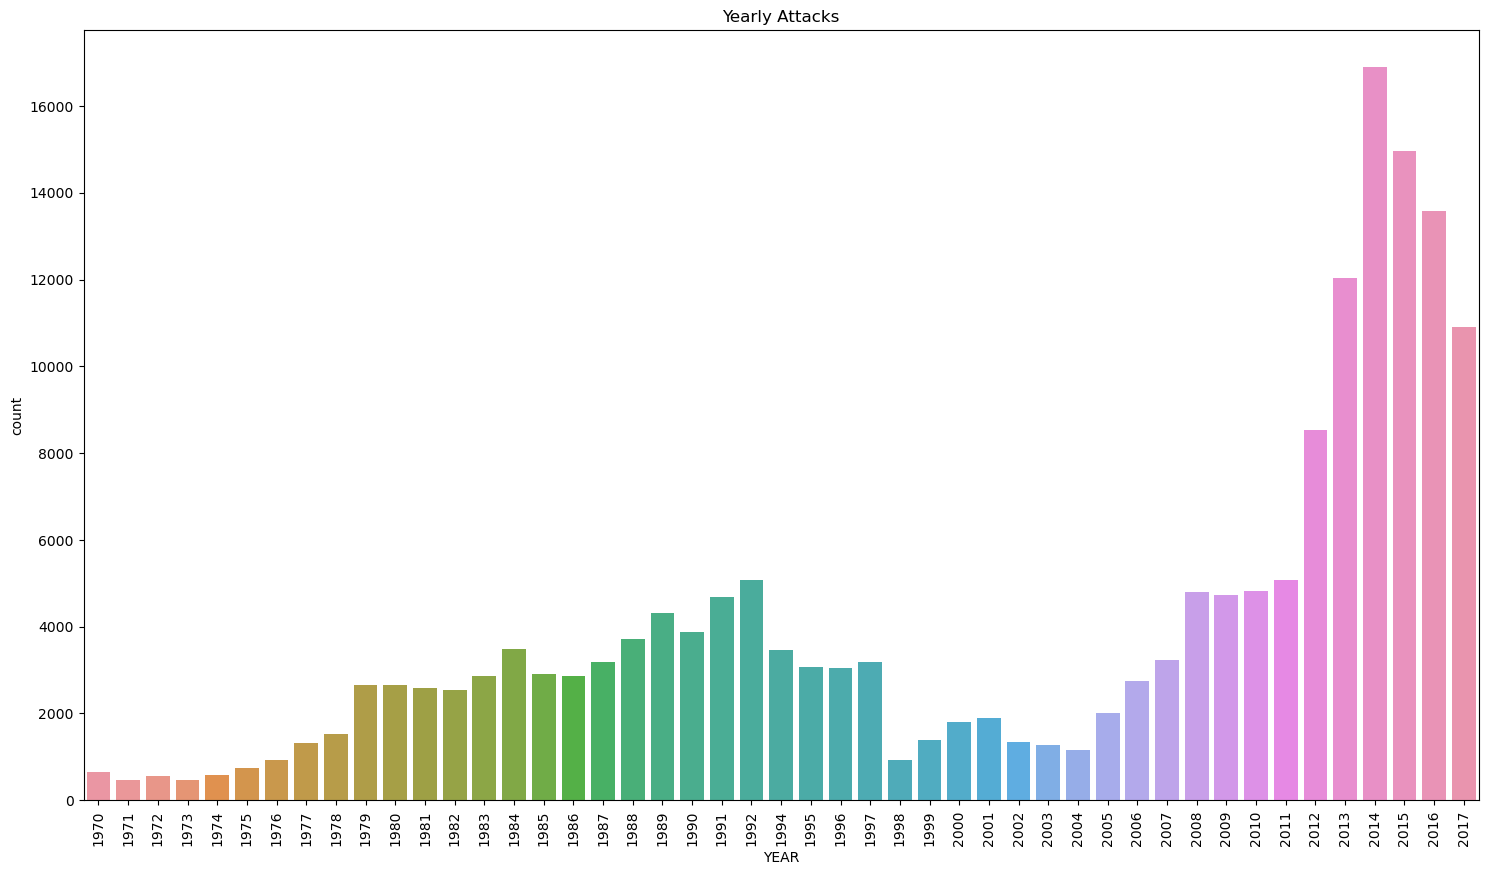

In [29]:
plt.figure(figsize=(18,10))
sns.countplot(x= 'YEAR' , data = df)
plt.title('Yearly Attacks')
plt.xticks(rotation = 90)
plt.show()

2014 is the year that witnessed most attacks in the last four decades and 1971 was the lowest

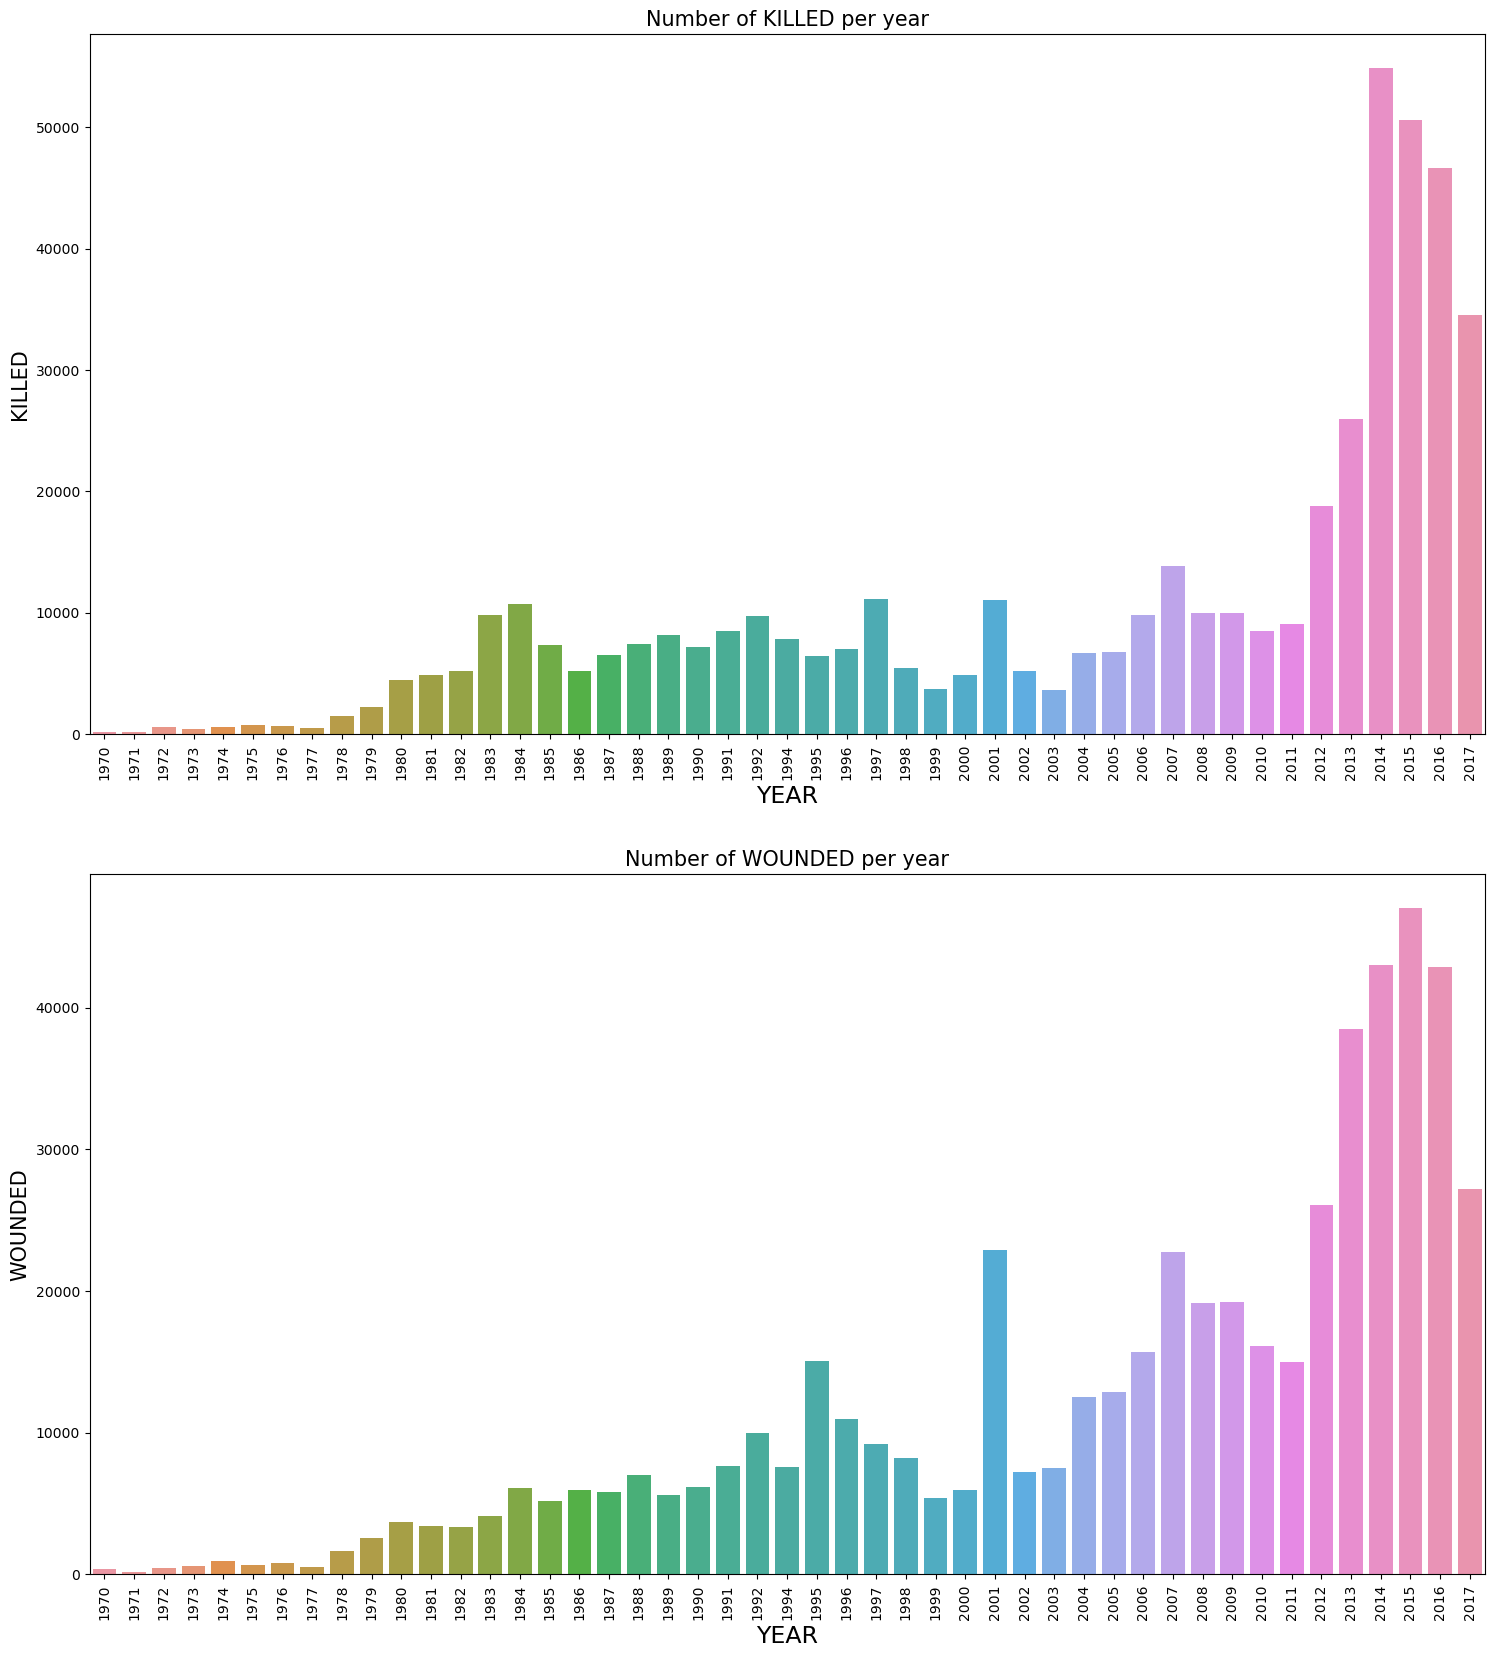

In [30]:
plt.figure(figsize=(18,20))
plot = 1
for i in ['KILLED' , 'WOUNDED'] :
    if plot <= 2:
        ax = plt.subplot(2,1,plot)
        dt = df.groupby('YEAR')[i].sum().sort_values(ascending = False).reset_index()
        sns.barplot(x = dt['YEAR'] , y = dt[i])
        plt.title('Number of {} per year'.format(i), fontsize = 15)
        plt.xlabel('YEAR' , fontsize = 17)
        plt.ylabel(i , fontsize=15)
        plt.xticks(rotation=90)
    plot += 1
    
plt.show()    

- 2014 has the highest number of killing crimes while 2015 has the highest crimes with wounded casualties
- 1971 has the lowest number of crimes with killed and wounded casualties

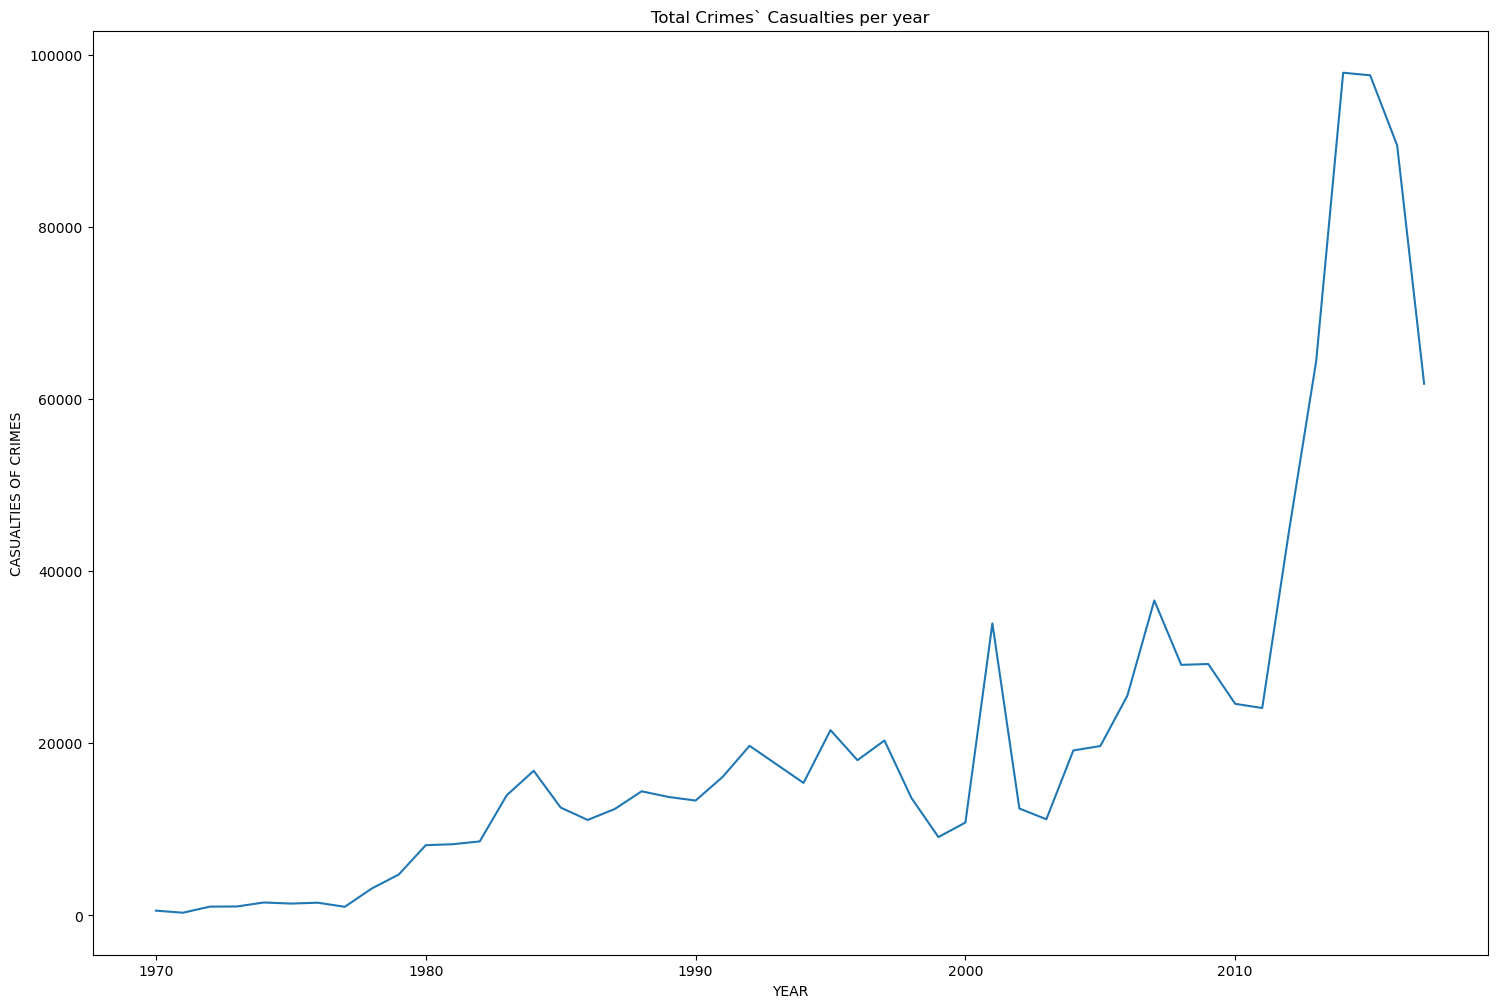

In [31]:
plt.figure(figsize=(18,12))
dt = df.groupby('YEAR')['CASUALTIES OF CRIMES'].sum()
sns.lineplot(data = dt)
plt.title('Total Crimes` Casualties per year')
plt.show()

- 2014 recorded the highest number of casualties around the world while 1971 recorded the lowest casualties of terror attacks
- It is notices that attacks had begun to increas at the 80s and had reched its peak in 2001 after september attacks

## Month

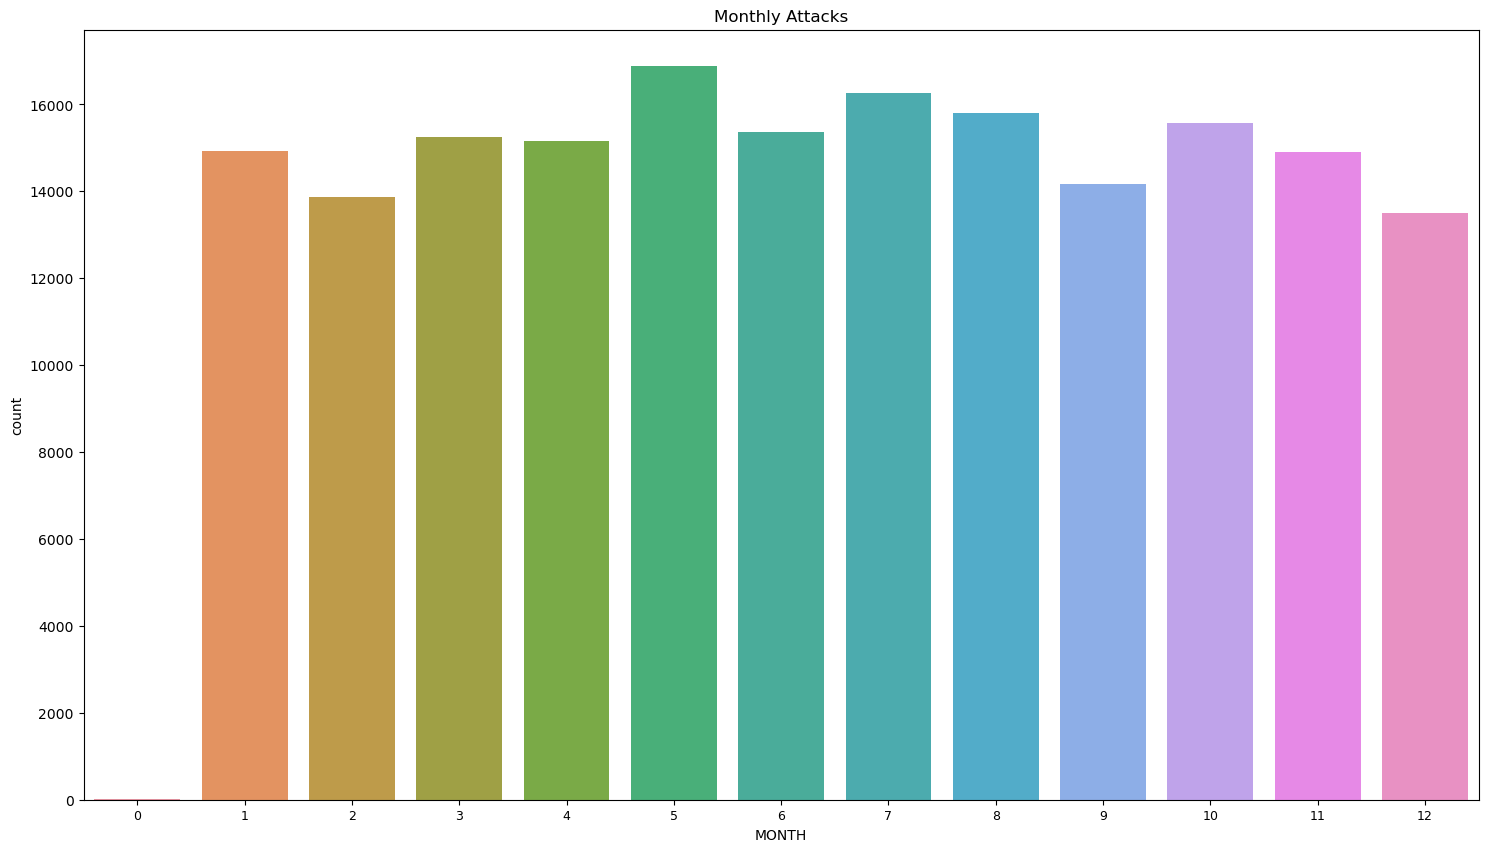

In [32]:
plt.figure(figsize=(18,10))
sns.countplot(x= 'MONTH' , data = df)
plt.title('Monthly Attacks')
plt.xticks(fontsize=9)
plt.show()

- May had the most record in terror attacks while December is the lowest

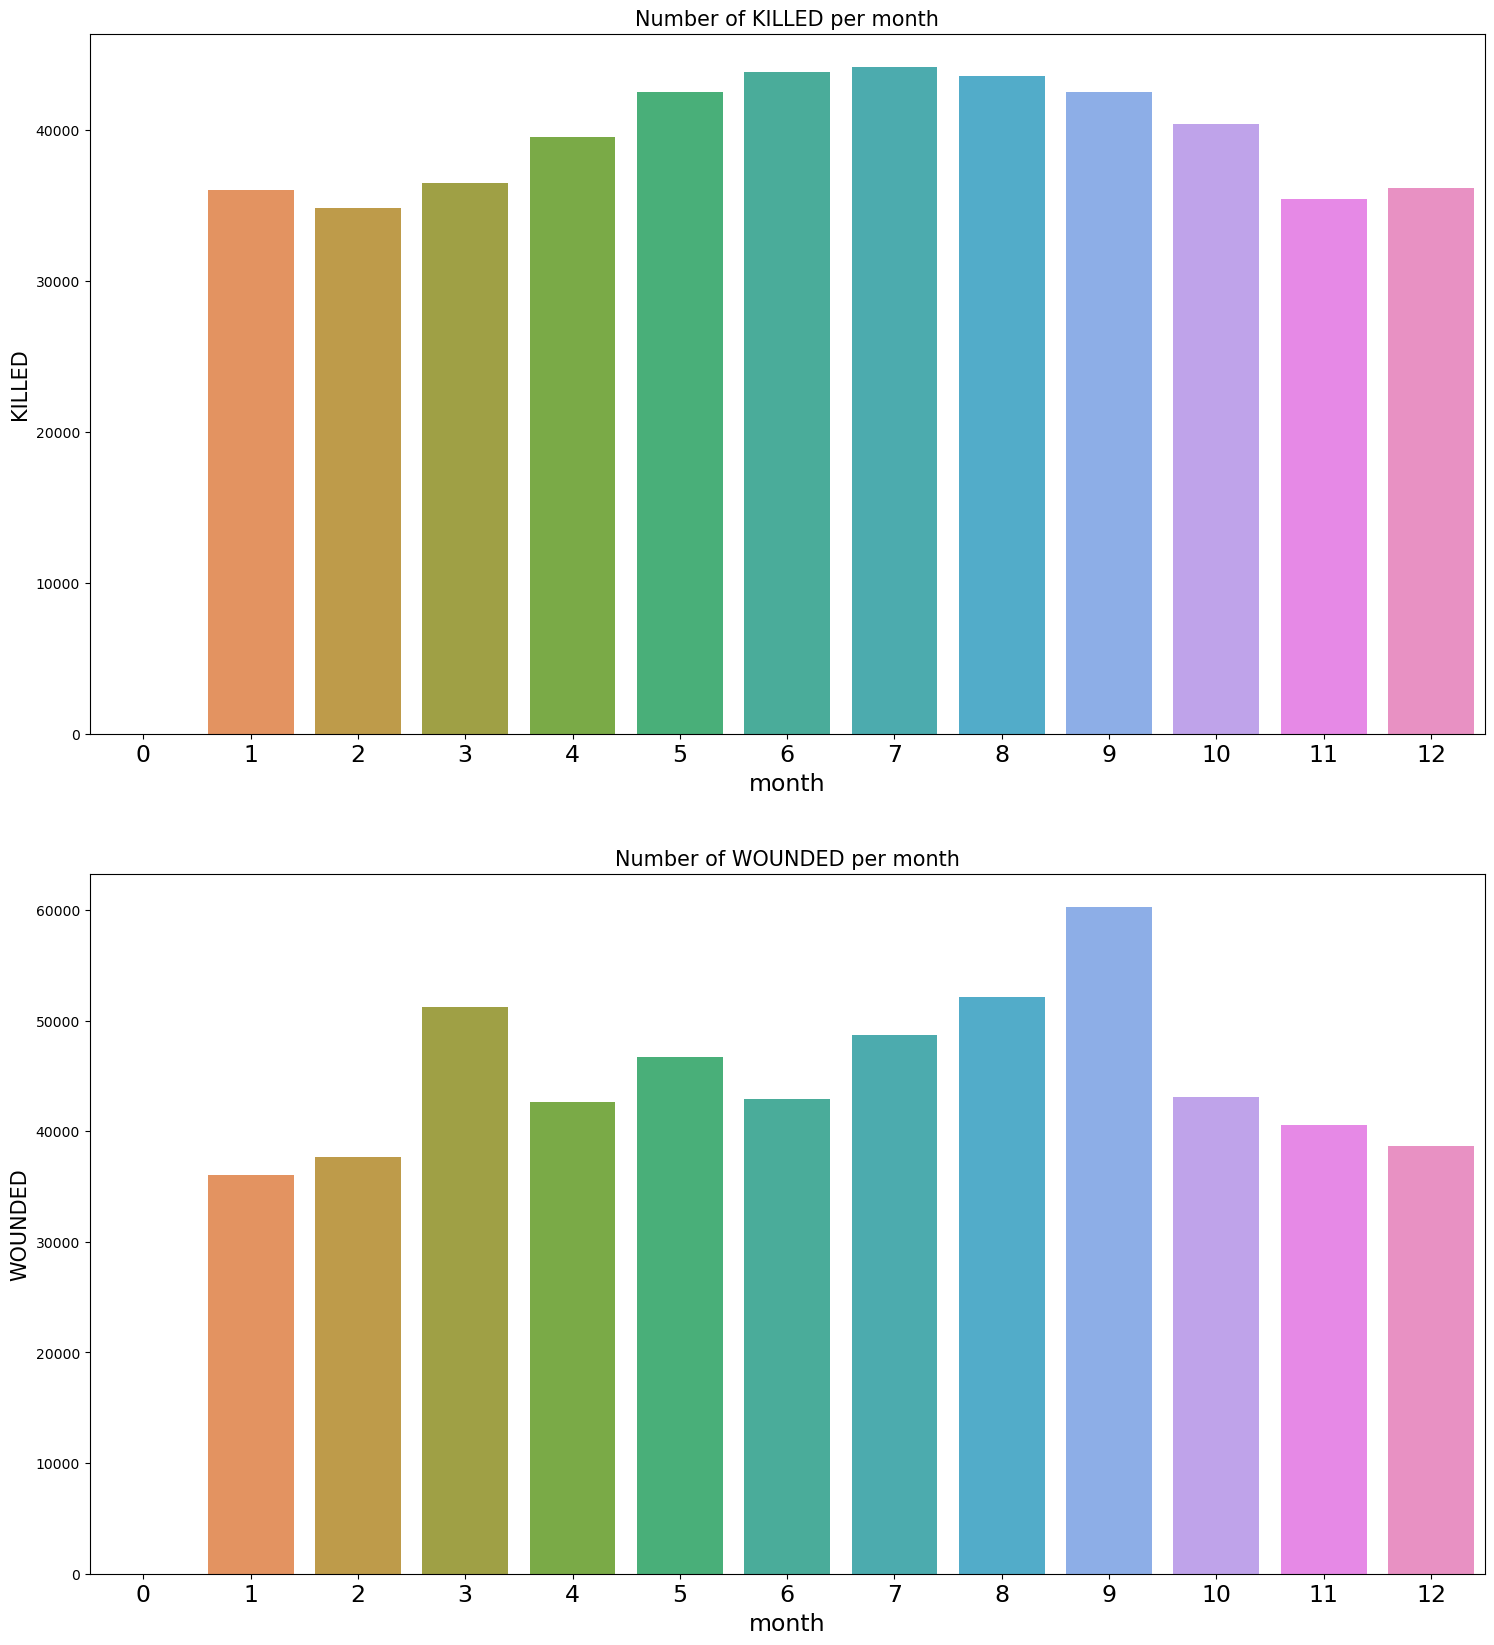

In [33]:
plt.figure(figsize=(18,20))
plot = 1
for i in ['KILLED' , 'WOUNDED'] :
    if plot <= 2:
        ax = plt.subplot(2,1,plot)
        dt = df.groupby('MONTH')[i].sum().sort_values(ascending = False).reset_index()
        sns.barplot(x =dt['MONTH']  , y = dt[i])
        plt.title('Number of {} per month'.format(i), fontsize = 15)
        plt.xlabel('month' , fontsize = 17)
        plt.ylabel(i , fontsize=15)
        plt.xticks( fontsize = 17)
    plot += 1
    
plt.show()    

- July recorded the most killed casualties while February recorded the lowest
- September recorded the most wounded casualties while January was the lowest

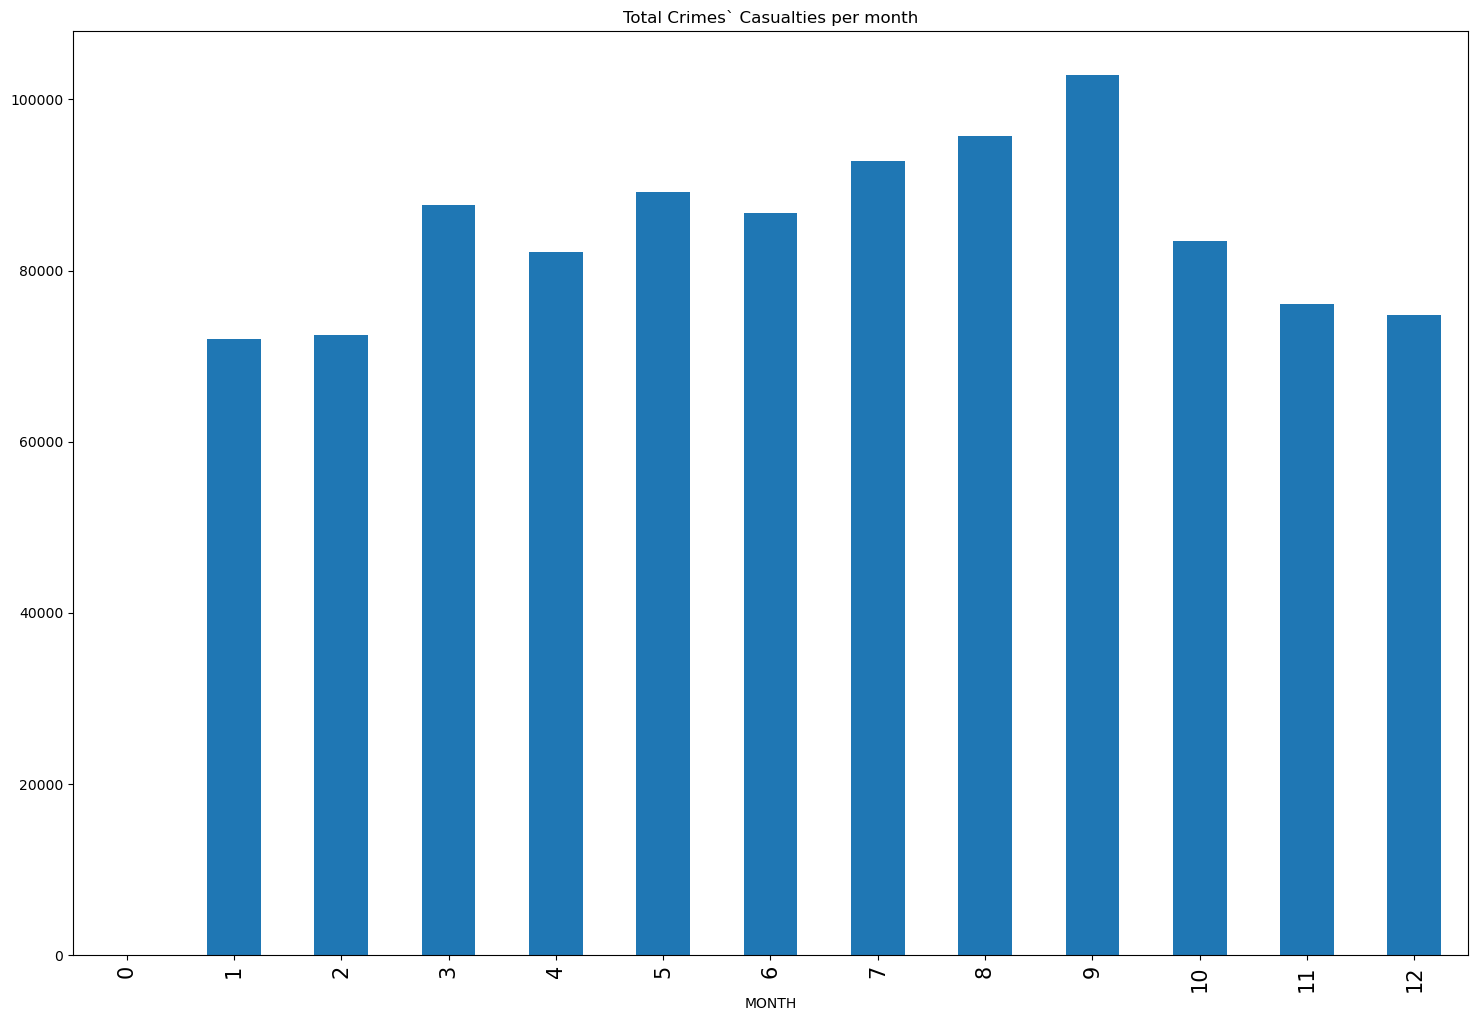

In [34]:
plt.figure(figsize=(18,12))
dt = df.groupby('MONTH')['CASUALTIES OF CRIMES'].sum()
dt.plot( kind='bar')
plt.title('Total Crimes` Casualties per month')
plt.xticks(fontsize=15)
plt.show()

September recorded the highest number of terror attacks' casualties in the last four decades and January is the lowest

## Region

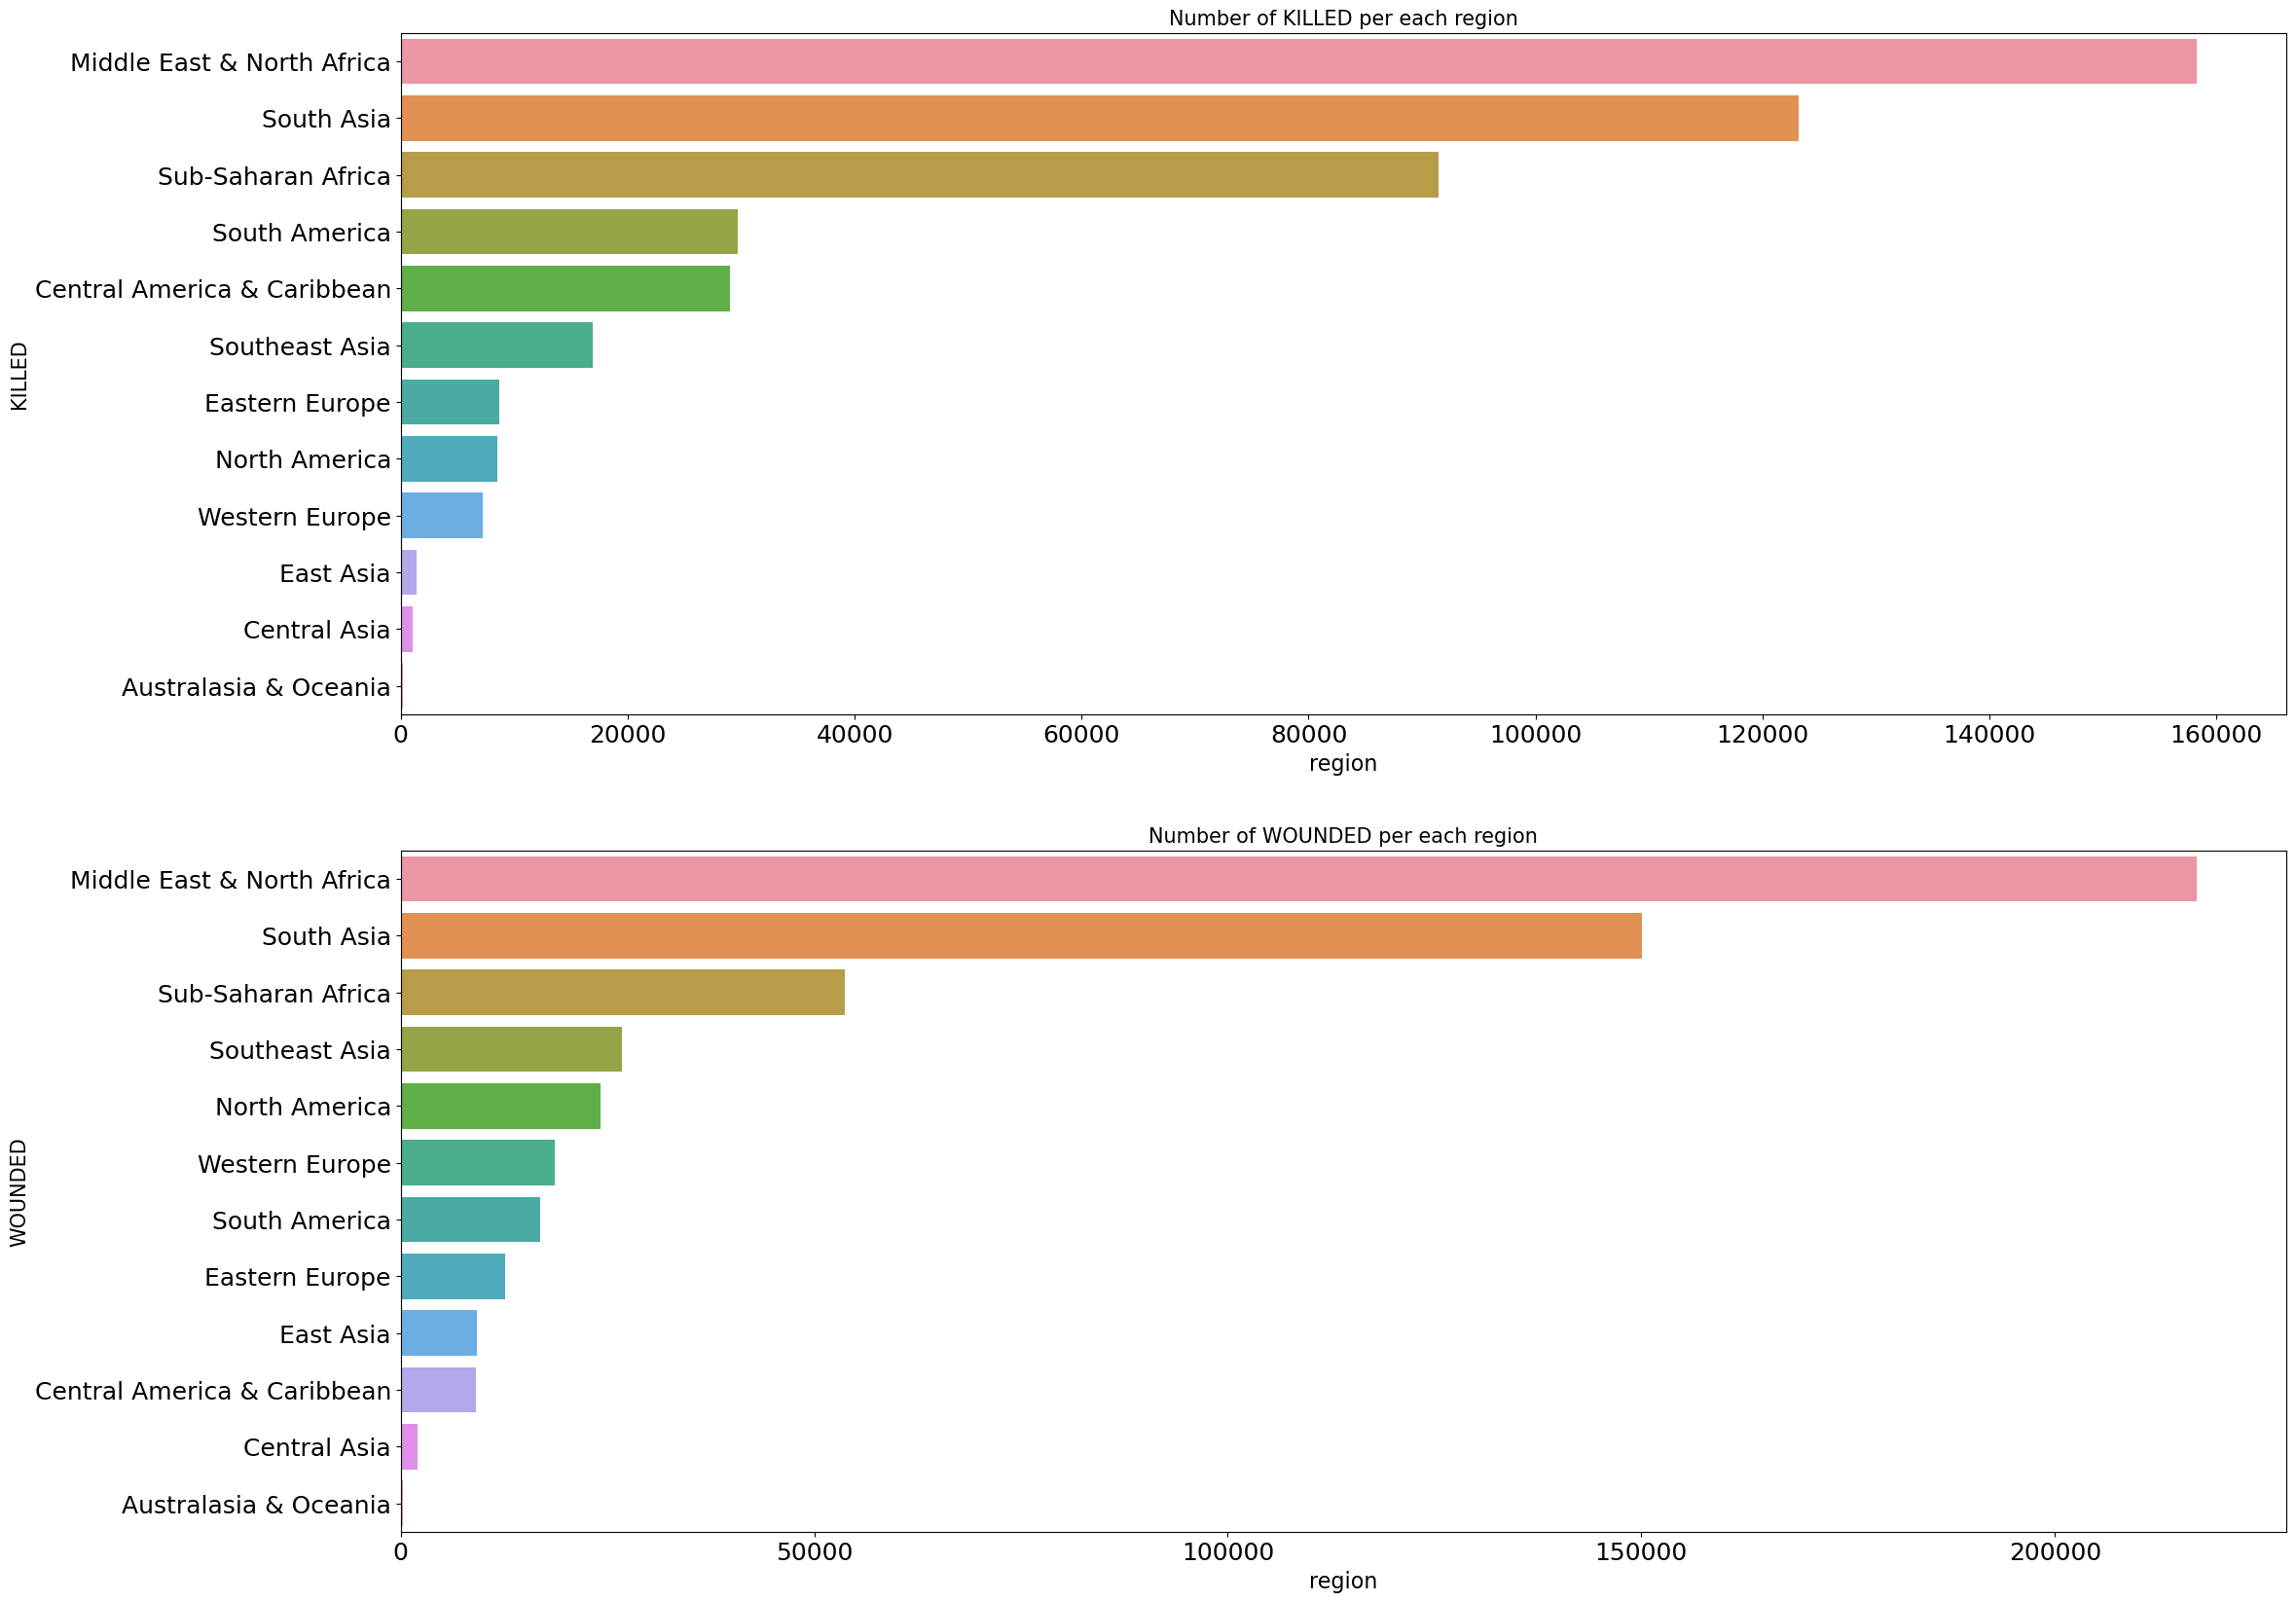

In [35]:
plt.figure(figsize=(25,20))
plot = 1
for i in ['KILLED' , 'WOUNDED'] :
    if plot <= 2:
        ax = plt.subplot(2,1,plot)
        dt = df.groupby('REGION')[i].sum().sort_values(ascending = False).reset_index()
        sns.barplot(x = dt[i] , y = dt['REGION'])
        plt.title('Number of {} per each region'.format(i), fontsize = 15)
        plt.xlabel('region' , fontsize = 16)
        plt.ylabel(i , fontsize=15)
        plt.xticks(fontsize= 18)
        plt.yticks(fontsize=18)
    plot += 1
    
plt.show()    

Middle East and North Africa recorded the highest numbers of killed and wounded casualties in the last five decades and that indicates that it the most dangerous region in the world while Australia and Oceania is the safest place

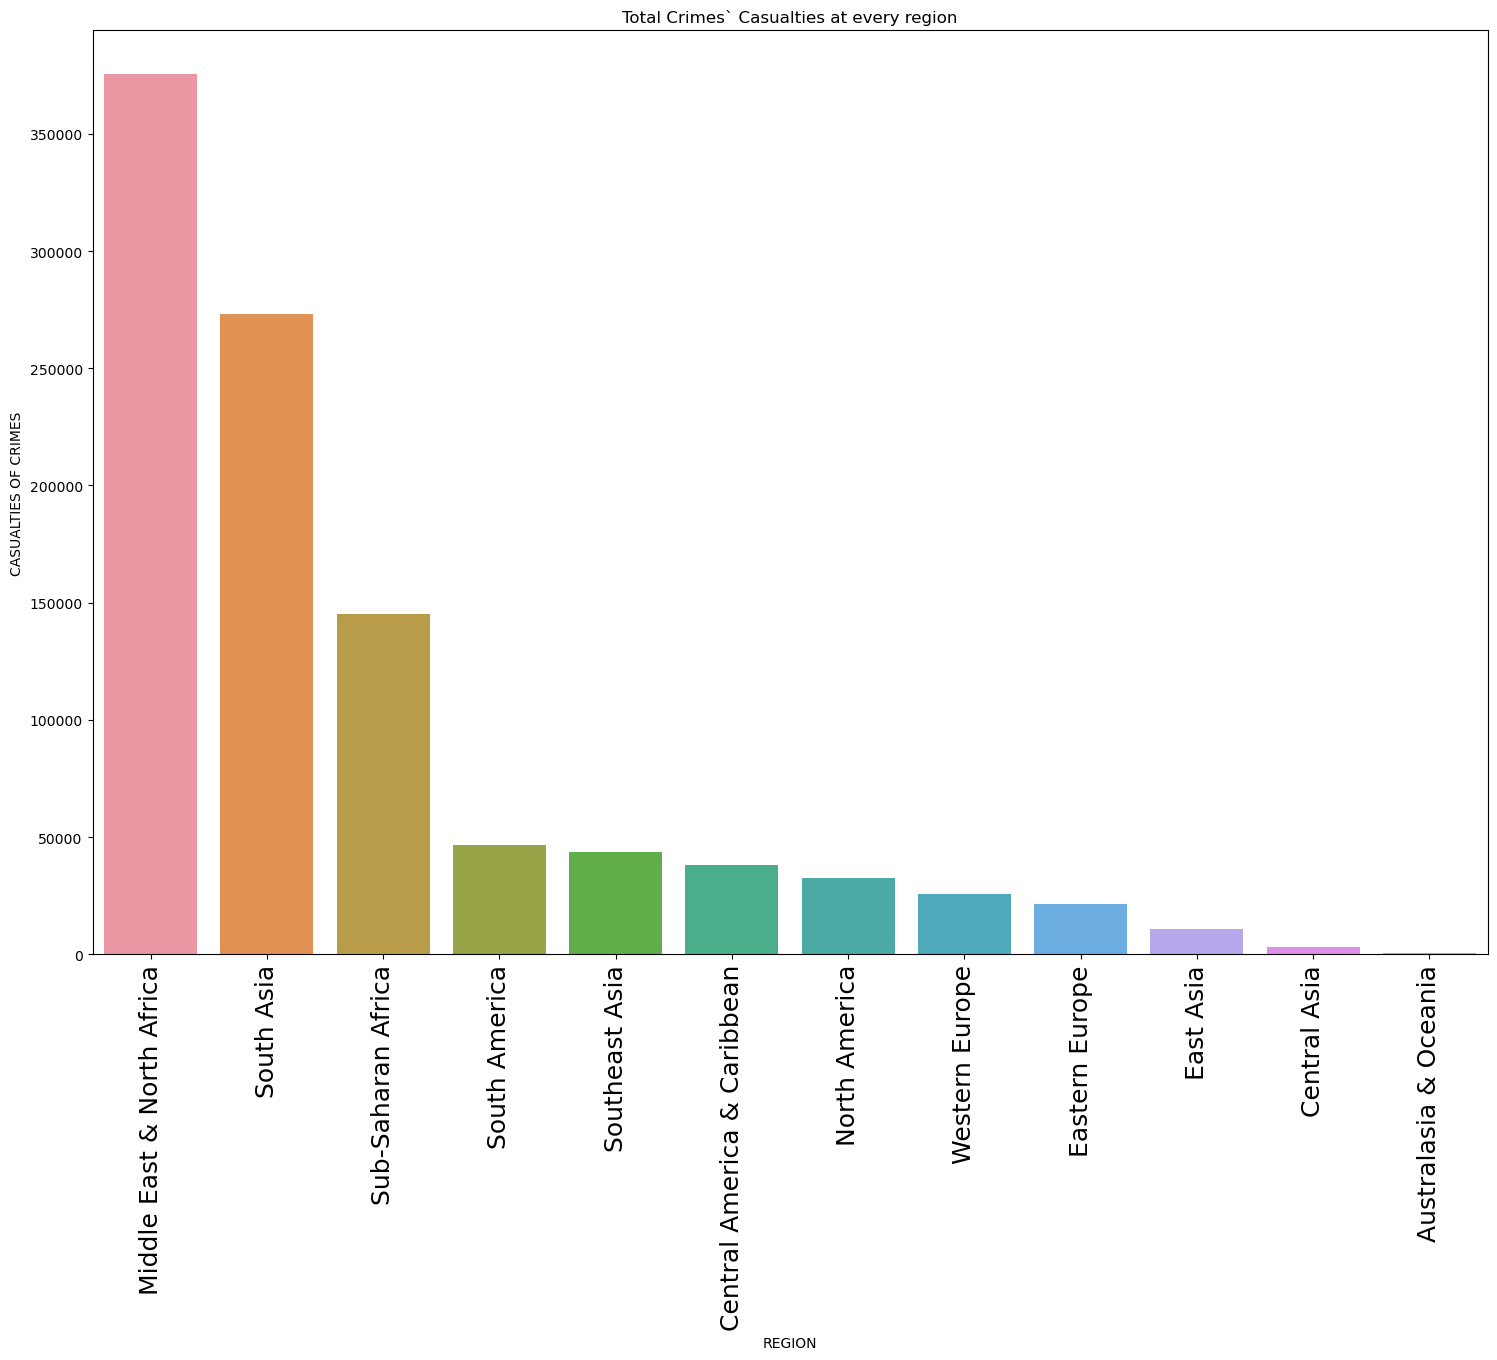

In [36]:
plt.figure(figsize=(18,12))
dt = df.groupby('REGION')['CASUALTIES OF CRIMES'].sum().sort_values(ascending=False).reset_index()
sns.barplot( x = 'REGION' , y ='CASUALTIES OF CRIMES' , data = dt )
plt.title('Total Crimes` Casualties at every region')
plt.xticks(rotation = 90 , fontsize = 18)
plt.show()

Conflicts in the middle east recorded the highest numbers of casualties because of terror crimes while Australia is the safest region

## City 

In [37]:
df['CITY'].value_counts()

Unknown                     9775
Baghdad                     7589
Karachi                     2652
Lima                        2359
Mosul                       2265
                            ... 
Sbet                           1
Sukirin                        1
Dehiattakandiya district       1
Oued-Djemaa                    1
Kubentog                       1
Name: CITY, Length: 36675, dtype: int64

we have many unknown reported places of terror attacks so we will take the highest 10 affected cities by attacks

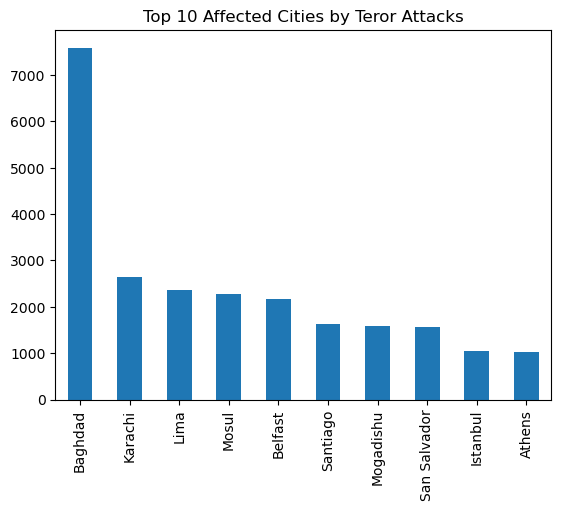

In [38]:
dt = df['CITY'].value_counts()[1:11]
dt.plot(kind='bar')
plt.title('Top 10 Affected Cities by Teror Attacks')
plt.show()

Baghdad is the most affected country by terror attacks

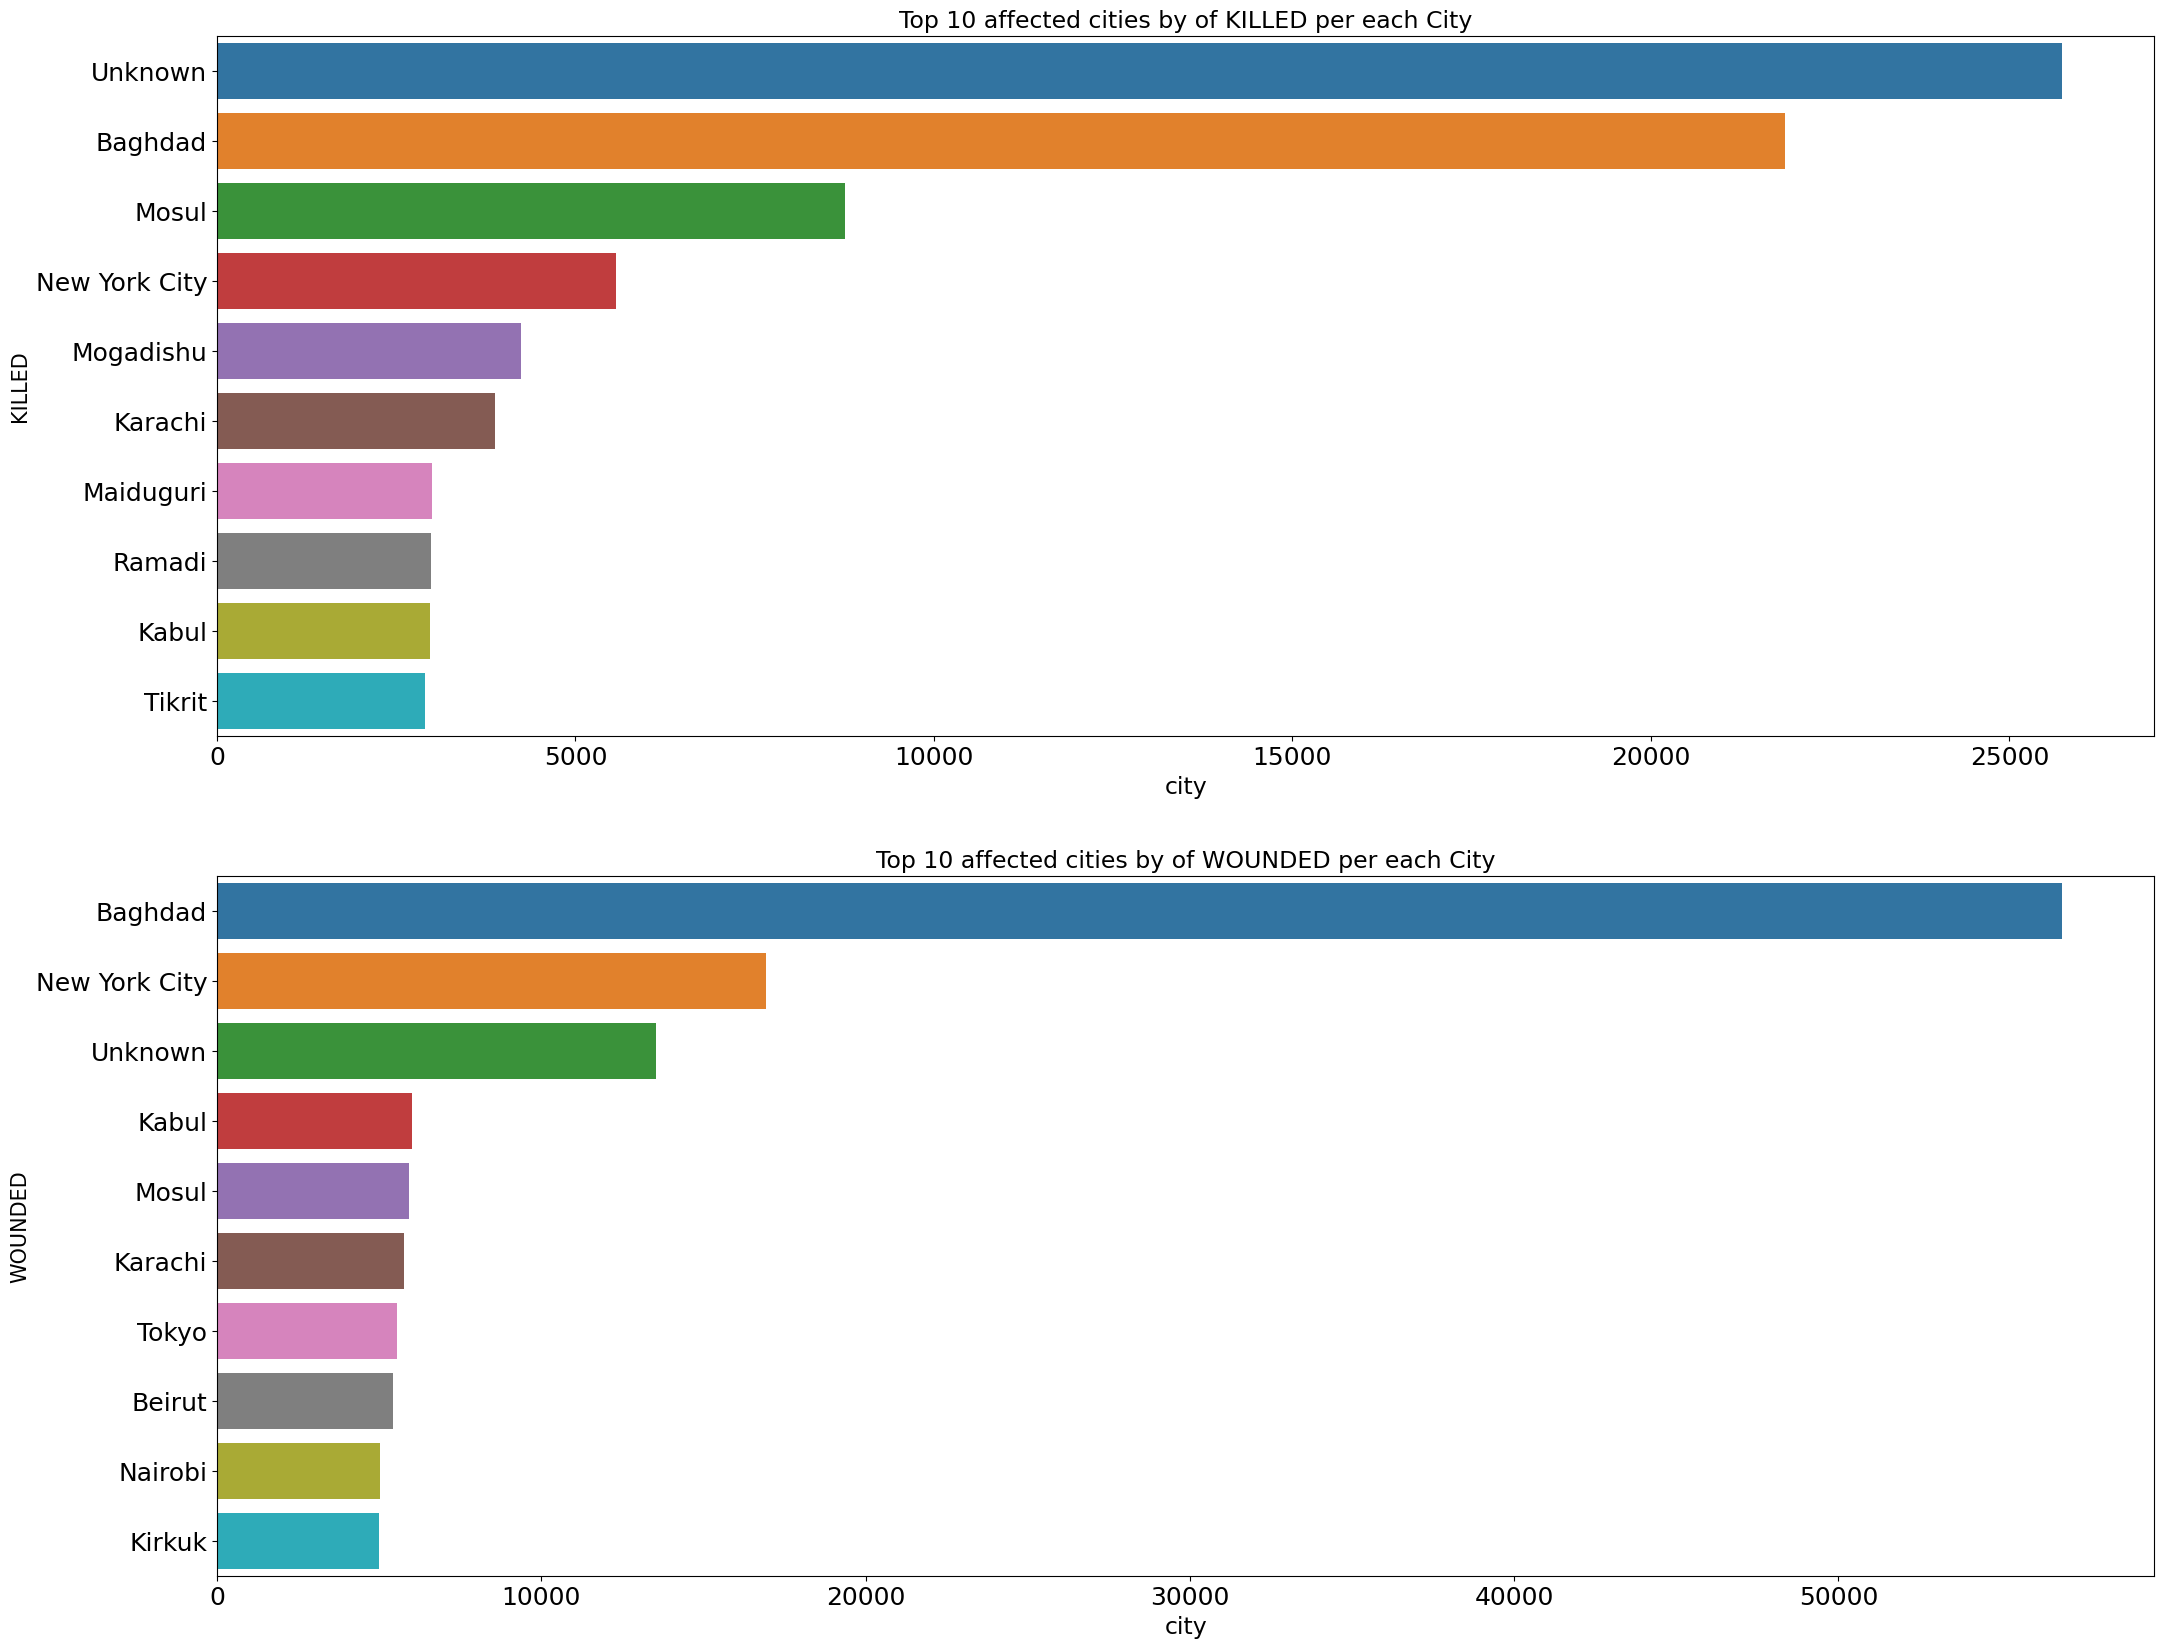

In [39]:
plt.figure(figsize=(25,20))
plot = 1
for i in ['KILLED' , 'WOUNDED'] :
    if plot <= 2:
        ax = plt.subplot(2,1,plot)
        dt = df.groupby('CITY')[i].sum().sort_values(ascending = False).reset_index()[0:10]
        sns.barplot(x = dt[i] , y = dt['CITY'])
        plt.title('Top 10 affected cities by of {} per each City'.format(i), fontsize = 17)
        plt.xlabel('city' , fontsize = 17)
        plt.ylabel(i , fontsize=15)
        plt.xticks(fontsize= 18)
        plt.yticks(fontsize=18)
    plot += 1
    
plt.show()    

Baghdad in IRAQ recorded the highest number of wounded and killed casuakties in the world

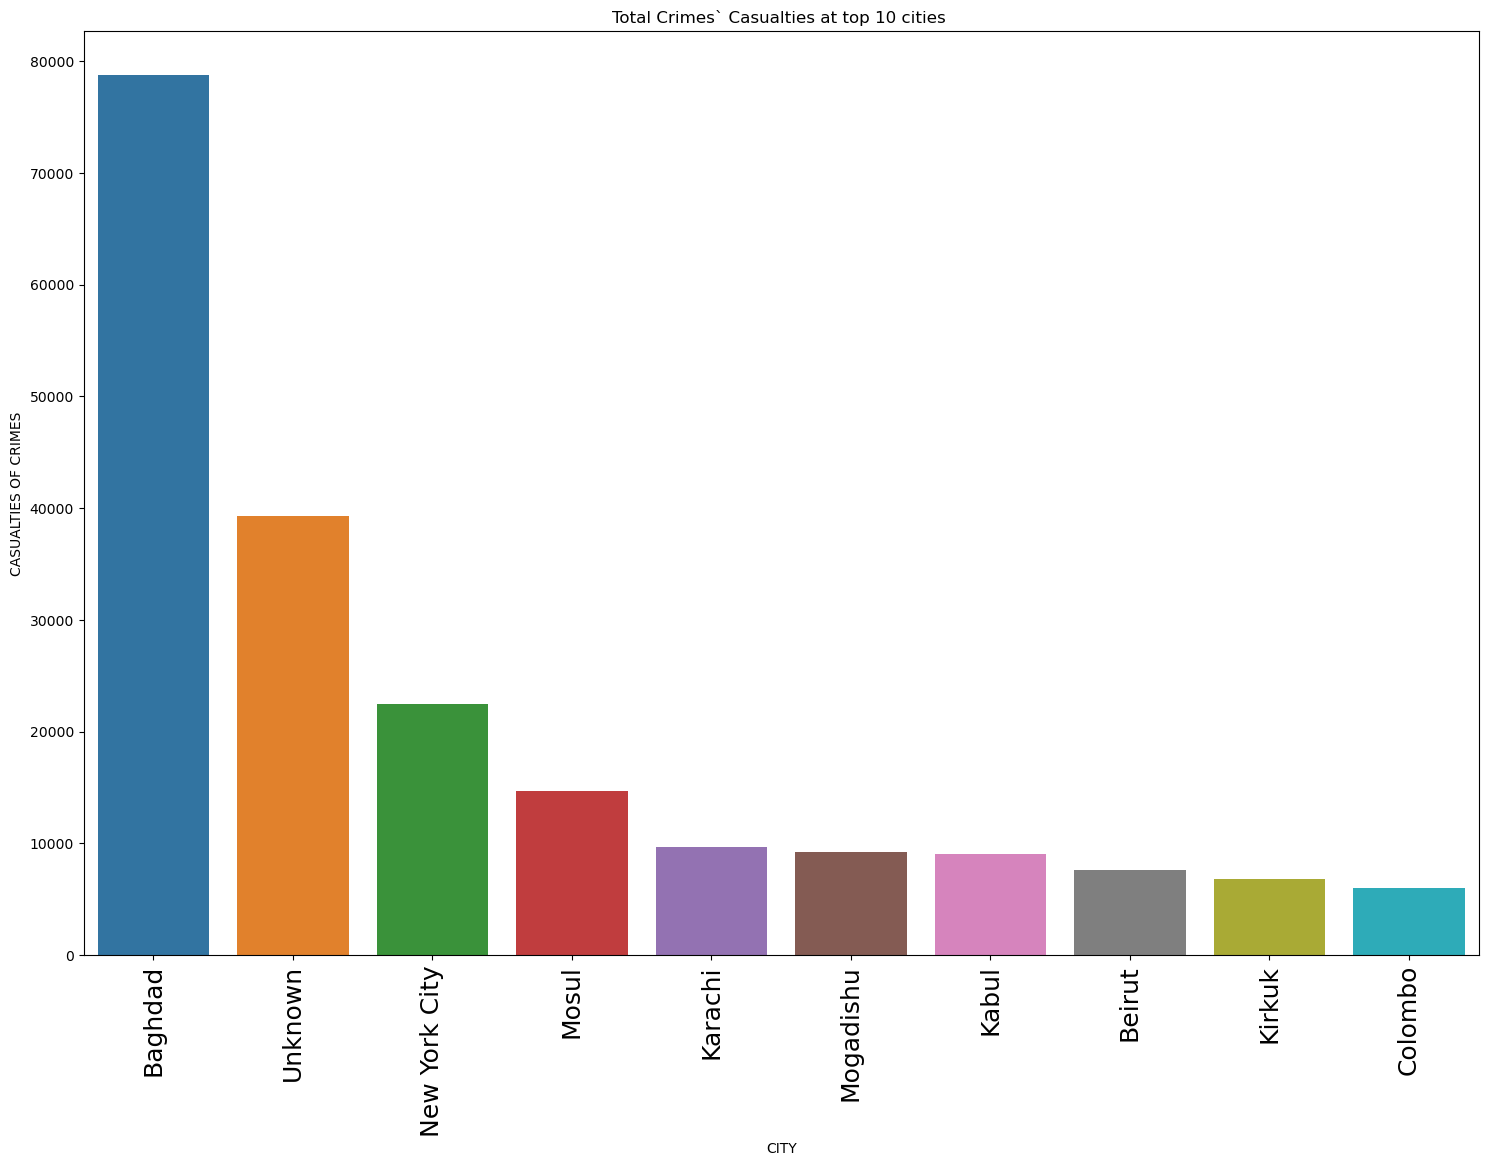

In [40]:
plt.figure(figsize=(18,12))
dt = df.groupby('CITY')['CASUALTIES OF CRIMES'].sum().sort_values(ascending=False).reset_index()[0:10]
sns.barplot( x = 'CITY' ,y ='CASUALTIES OF CRIMES' , data = dt )
plt.title('Total Crimes` Casualties at top 10 cities ')
plt.xticks(rotation = 90 , fontsize = 18)
plt.show()

Baghdad in IRAQ (the middle east) recorded the highest number of casualties around the world

## Country 

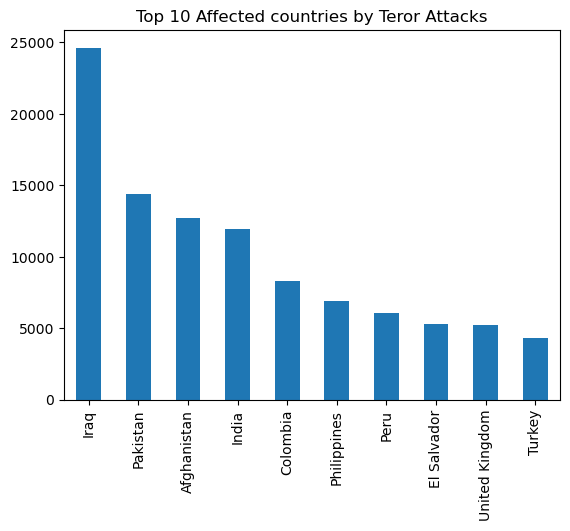

In [41]:
dt = df['COUNTRY'].value_counts()[0:10]
dt.plot(kind='bar')
plt.title('Top 10 Affected countries by Teror Attacks')
plt.show()

- Iraq in the middle east is the most affected country by terror attack and Pakistan in the same region of the middle east is the second
- UK is the only western country among the top 10 dangerous countries in the world

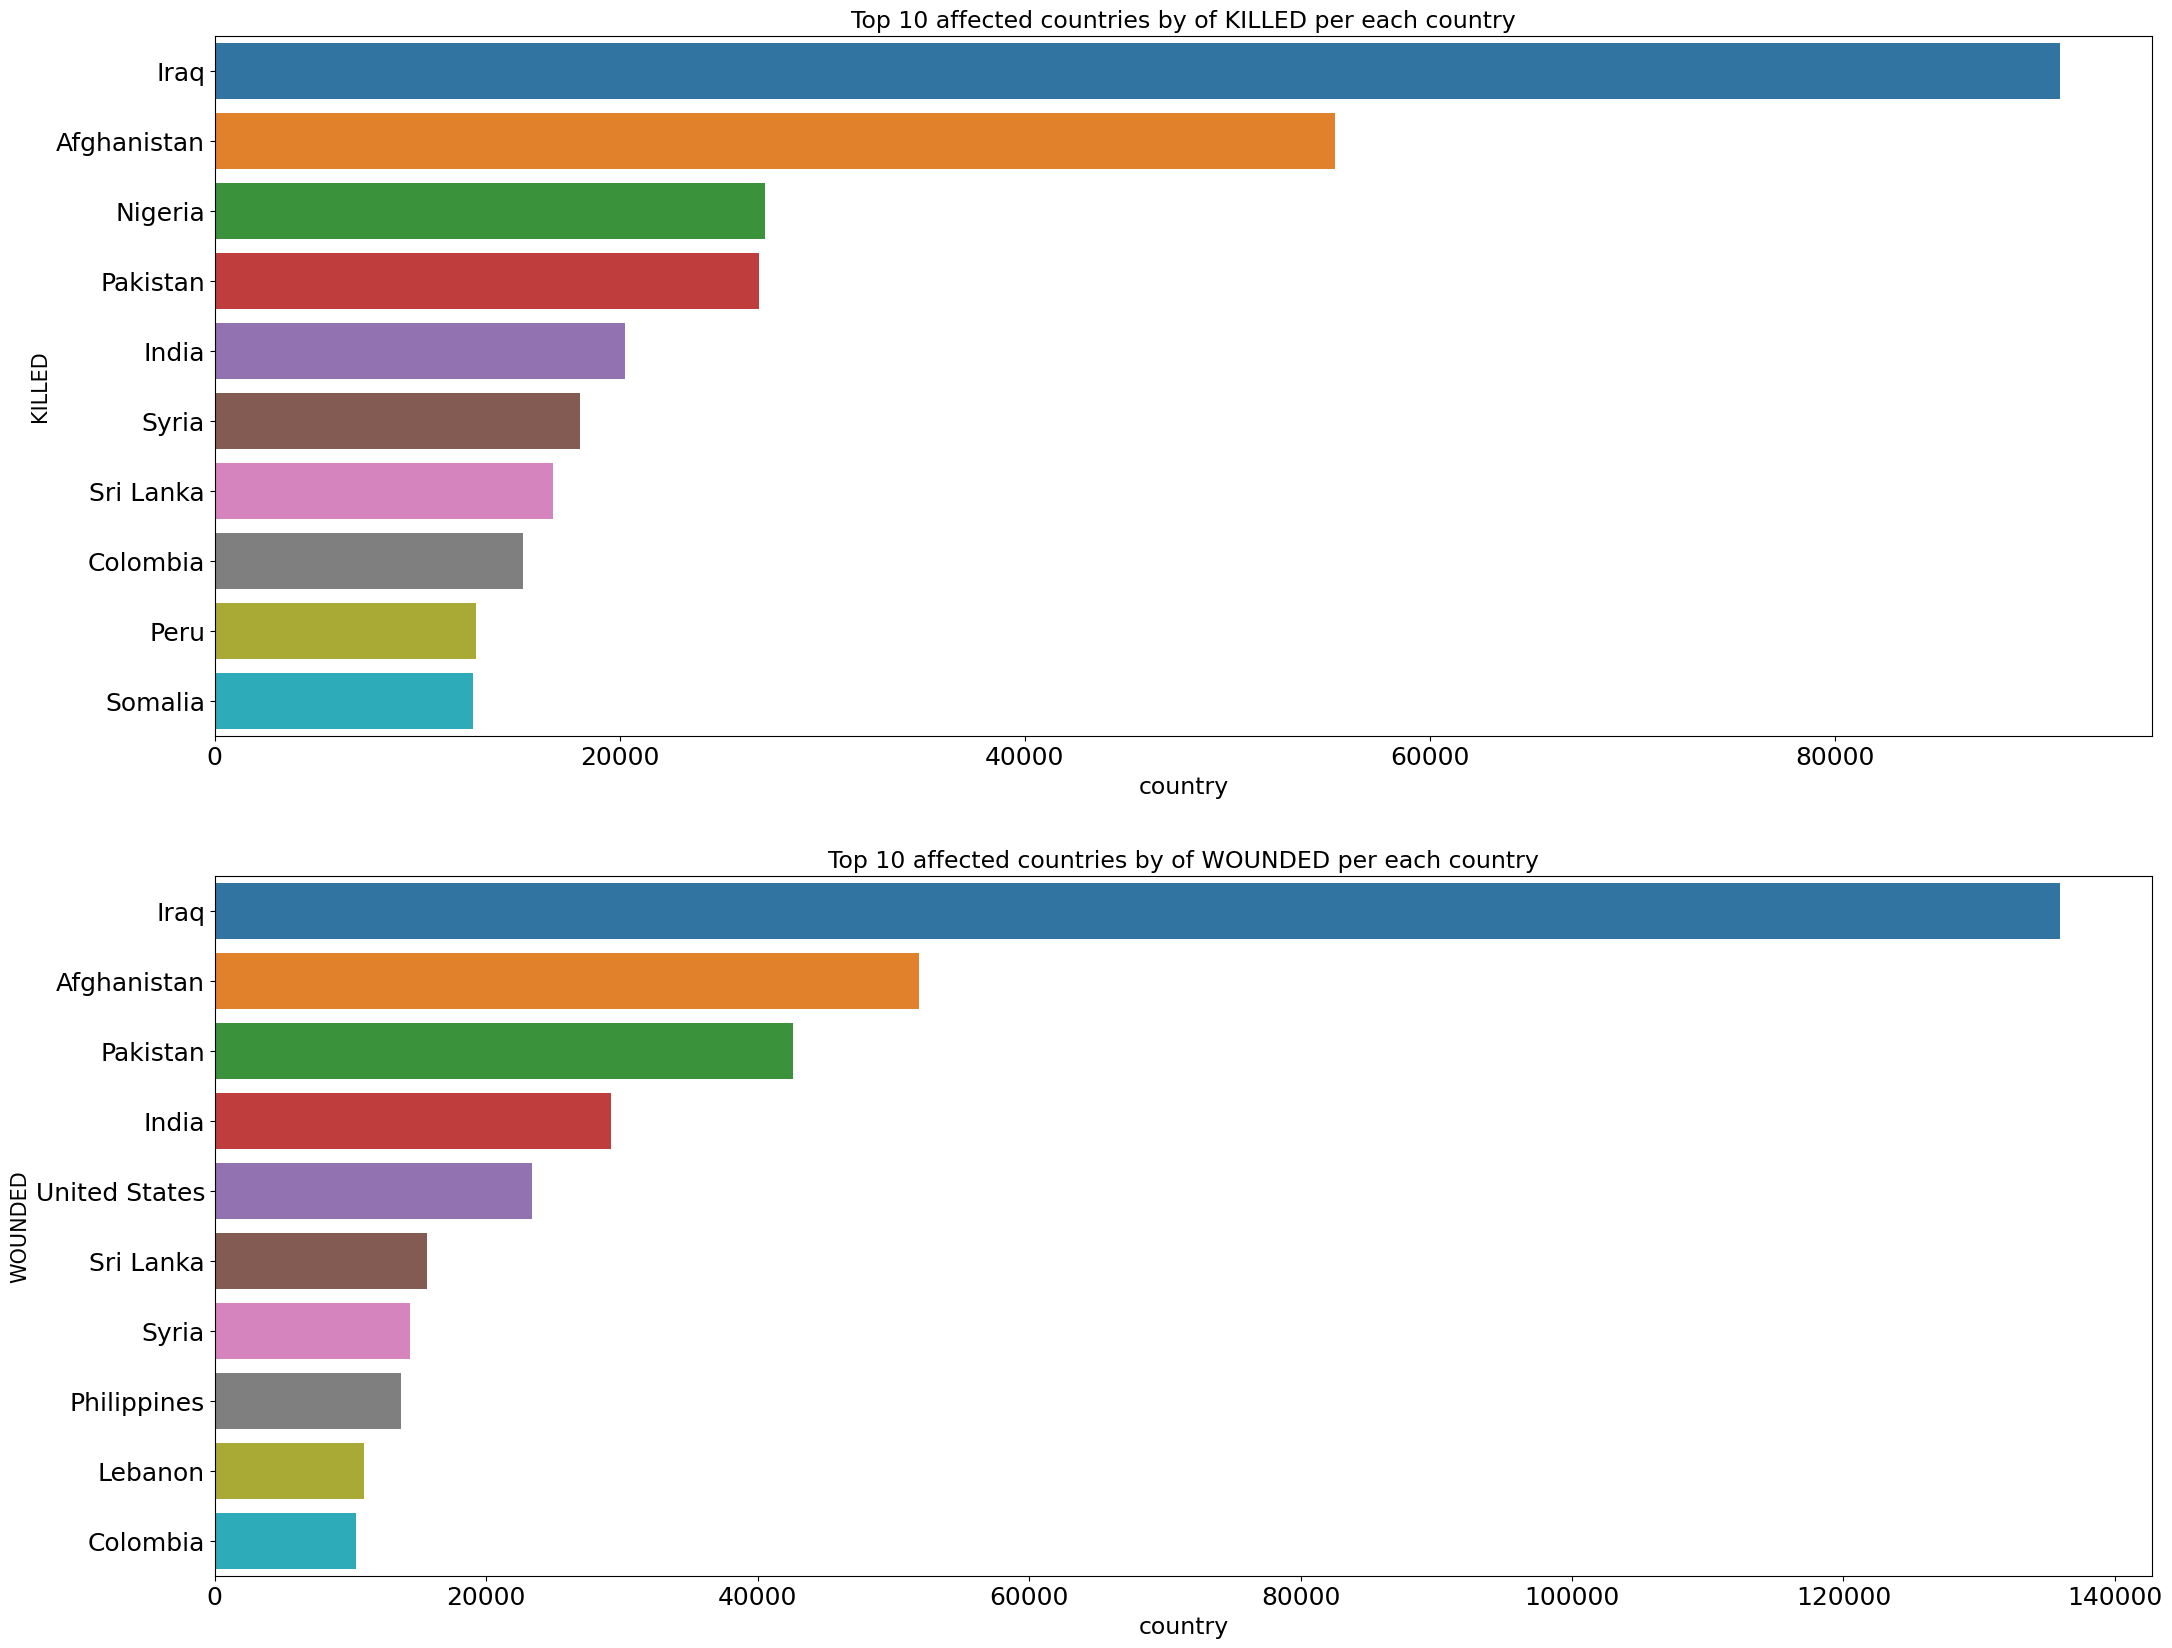

In [42]:
plt.figure(figsize=(25,20))
plot = 1
for i in ['KILLED' , 'WOUNDED'] :
    if plot <= 2:
        ax = plt.subplot(2,1,plot)
        dt = df.groupby('COUNTRY')[i].sum().sort_values(ascending = False).reset_index()[0:10]
        sns.barplot(x = dt[i] , y = dt['COUNTRY'])
        plt.title('Top 10 affected countries by of {} per each country'.format(i), fontsize = 17)
        plt.xlabel('country' , fontsize = 17)
        plt.ylabel(i , fontsize=15)
        plt.xticks(fontsize= 18)
        plt.yticks(fontsize=18)
    plot += 1
    
plt.show()    

Iraq recorded the worst conditions of security by the highest numbers of killed and wounded casualties arund the world and Afghanistan in the second place

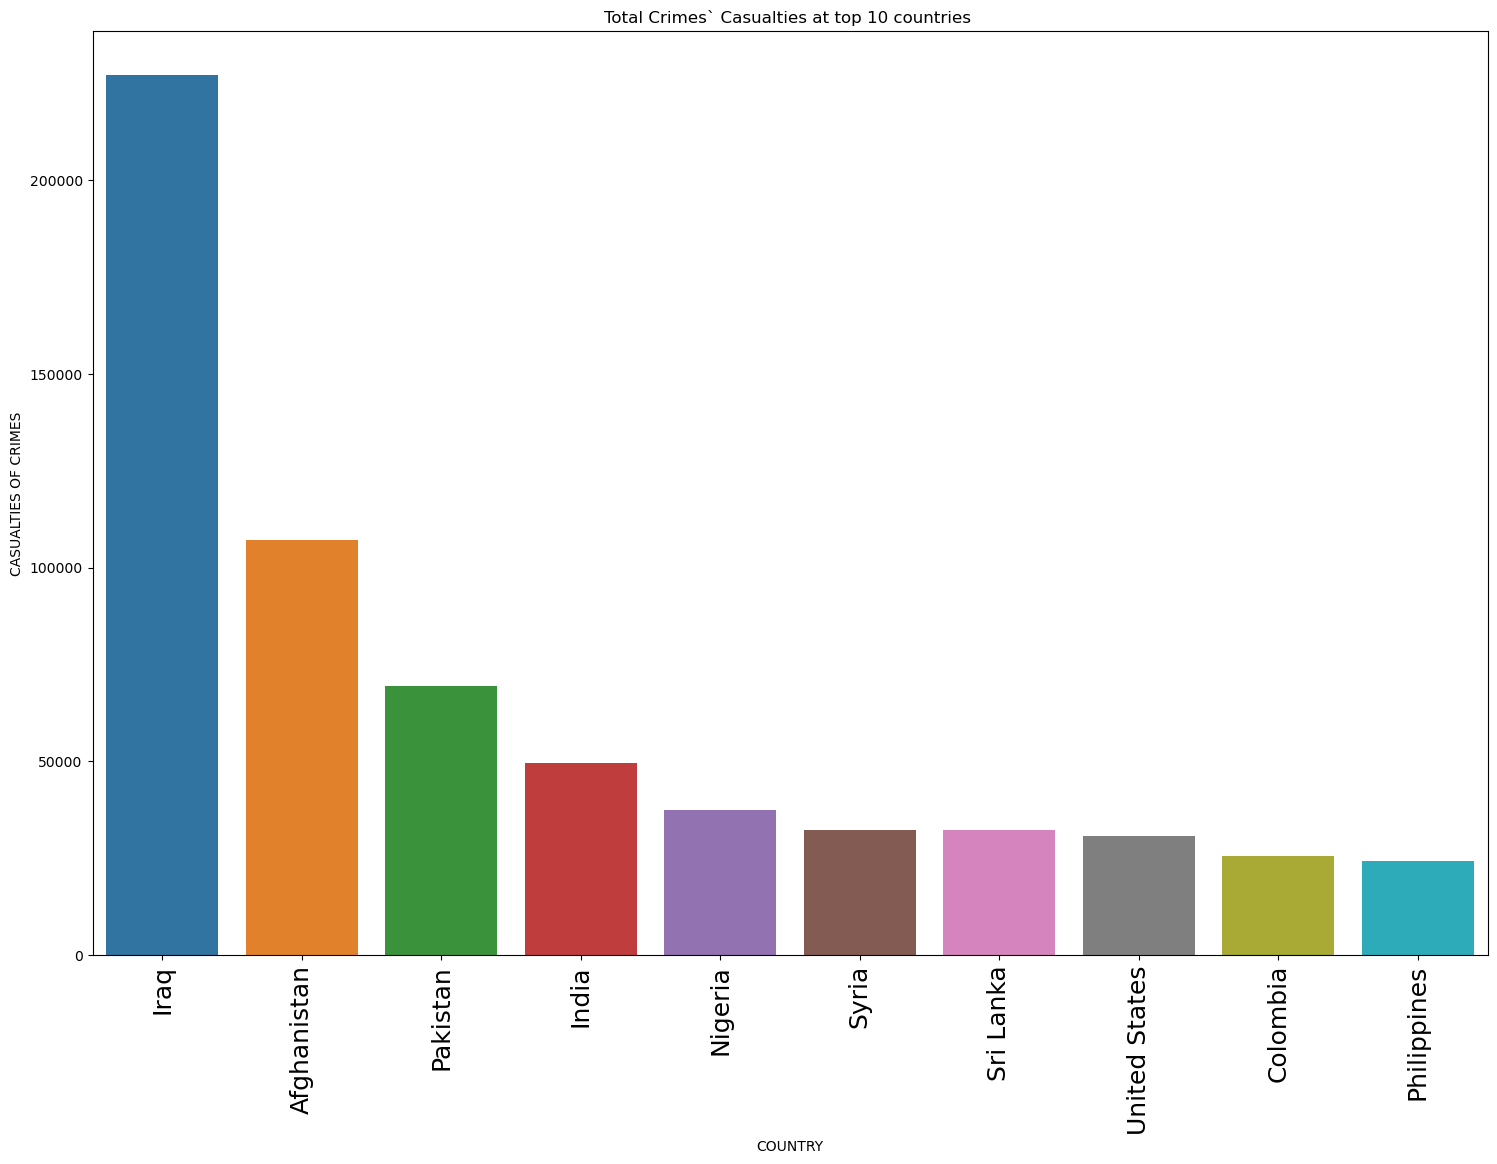

In [43]:
plt.figure(figsize=(18,12))
dt = df.groupby('COUNTRY')['CASUALTIES OF CRIMES'].sum().sort_values(ascending=False).reset_index()[0:10]
sns.barplot( x = 'COUNTRY' ,y ='CASUALTIES OF CRIMES' , data = dt )
plt.title('Total Crimes` Casualties at top 10 countries ')
plt.xticks(rotation = 90 , fontsize = 18)
plt.show()

Iraq recorded the highest number of casualties resulted by terror attacks around the world

## Attack Type 

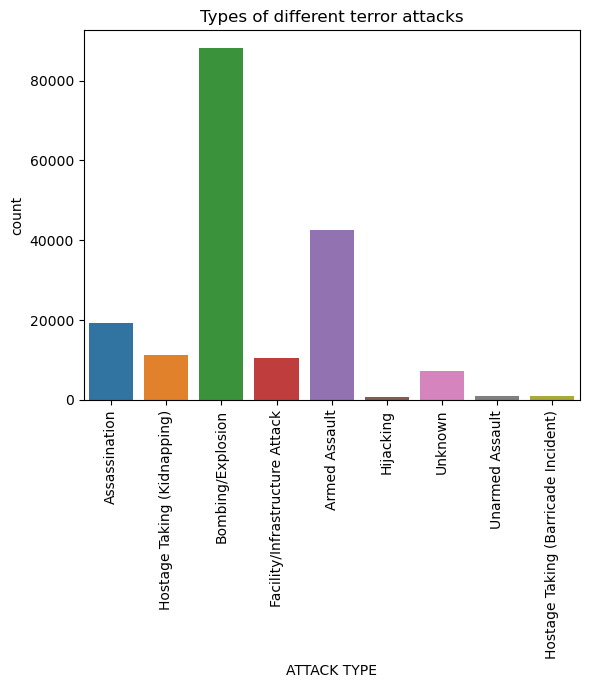

In [44]:
sns.countplot(x= df['ATTACK TYPE'])
plt.title('Types of different terror attacks')
plt.xticks(rotation = 90)
plt.show()

Bombing and Explosion crimes is the most committed while Hijacking is the lowest

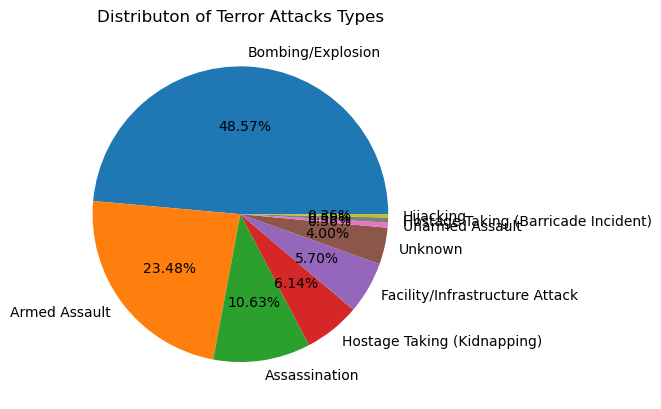

In [45]:
plt.pie(x = df['ATTACK TYPE'].value_counts() , labels = df['ATTACK TYPE'].value_counts().index,
       autopct='%0.2f%%')
plt.title('Distributon of Terror Attacks Types')
plt.show()

Bombing and Explosion attacks has the largest proportion among all types of terror attacks

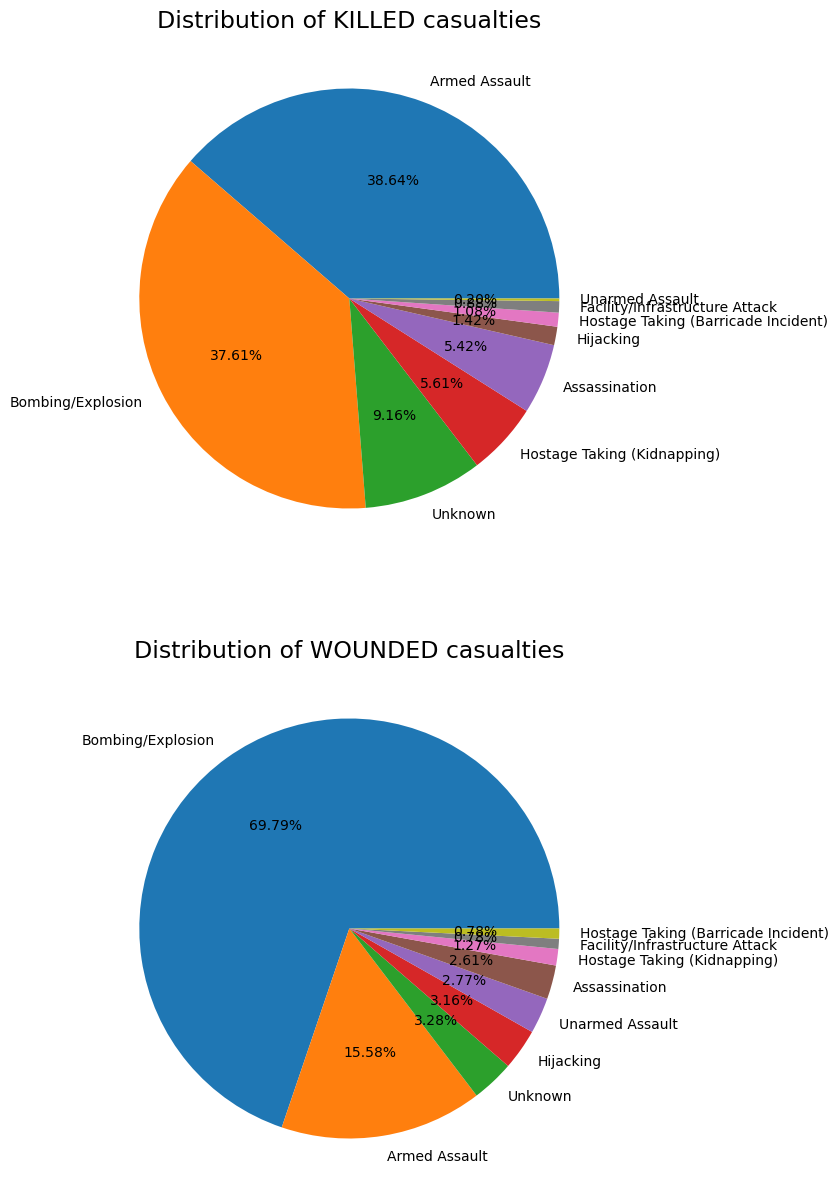

In [46]:
plt.figure(figsize=(15,15))
plot = 1
for i in ['KILLED' , 'WOUNDED'] :
    if plot <= 2:
        ax = plt.subplot(2,1,plot)
        dt = df.groupby('ATTACK TYPE')[i].sum().sort_values(ascending = False).reset_index()
        plt.pie(x = dt[i] , labels = dt['ATTACK TYPE'], autopct='%0.2f%%' , data = dt)
        plt.title('Distribution of {} casualties'.format(i), fontsize = 17)
       
    plot += 1
    
plt.show()    

- Most of killed ones was because of Armed Assault and the most wounds was beacuase of bombing attacks

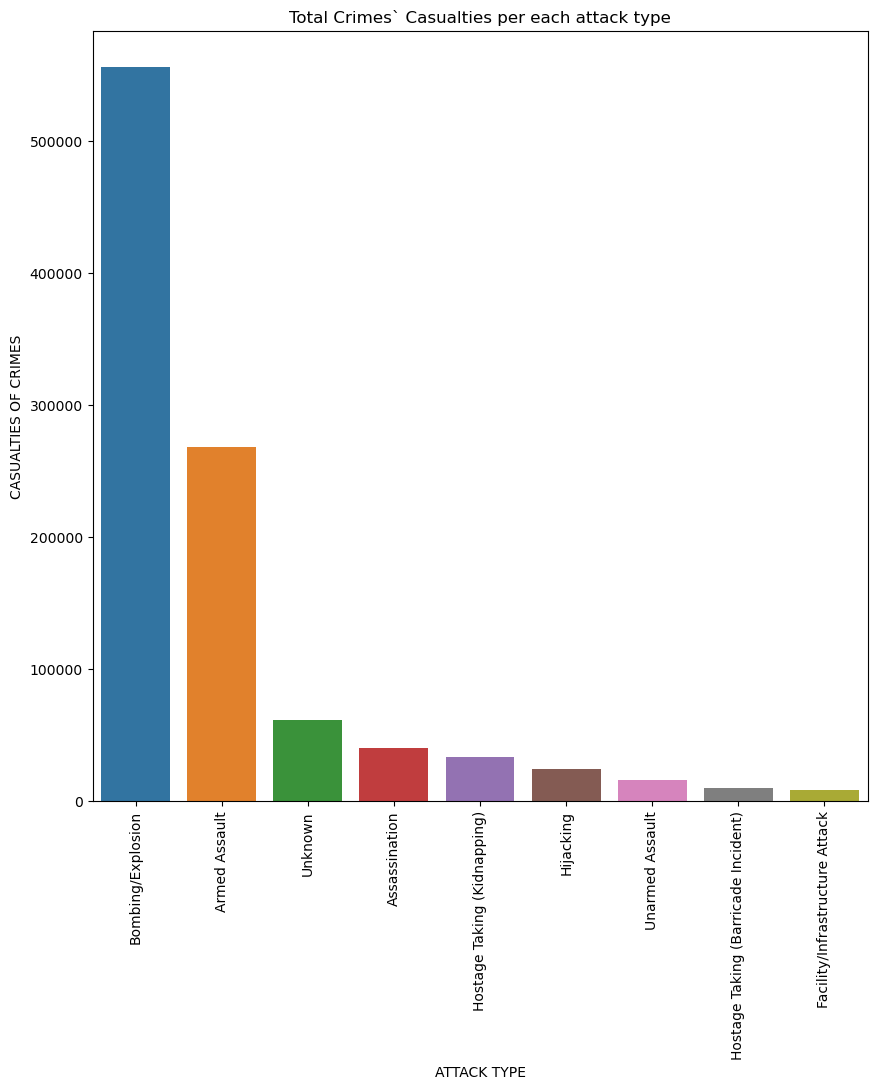

In [47]:
plt.figure(figsize=(10,10))
dt = df.groupby('ATTACK TYPE')['CASUALTIES OF CRIMES'].sum().sort_values(ascending=False).reset_index()
sns.barplot( x = 'ATTACK TYPE' ,y ='CASUALTIES OF CRIMES' , data = dt )
plt.title('Total Crimes` Casualties per each attack type')
plt.xticks(rotation = 90 , fontsize = 10)
plt.show()

- Bombing and Explosion attacks caused the highest number of casualties
- Infrastructure attacks recorded the lowest number of casualties

## Target Type 

In [48]:
df['TARGET TYPE'].value_counts()

Private Citizens & Property       43511
Military                          27984
Police                            24506
Government (General)              21283
Business                          20669
Transportation                     6799
Utilities                          6023
Unknown                            5898
Religious Figures/Institutions     4440
Educational Institution            4322
Government (Diplomatic)            3573
Terrorists/Non-State Militia       3039
Journalists & Media                2948
Violent Political Party            1866
Airports & Aircraft                1343
Telecommunication                  1009
NGO                                 970
Tourists                            440
Maritime                            351
Food or Water Supply                317
Abortion Related                    263
Other                               137
Name: TARGET TYPE, dtype: int64

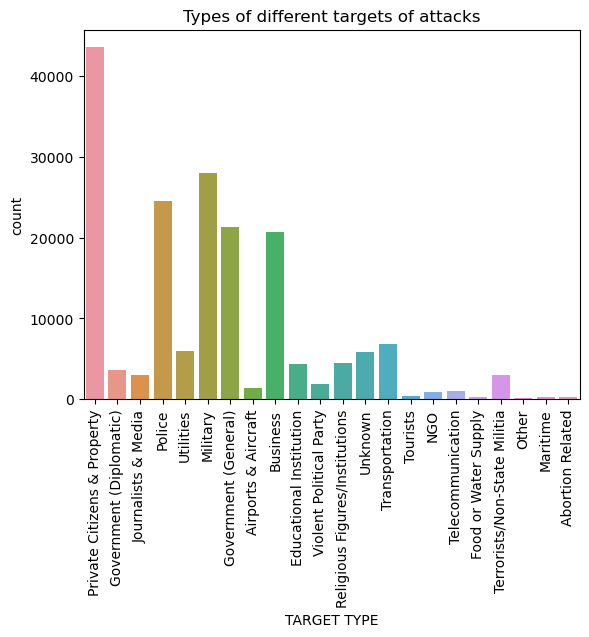

In [49]:
sns.countplot(x= df['TARGET TYPE'])
plt.title('Types of different targets of attacks')
plt.xticks(rotation = 90)
plt.show()

Private properties and citizens are the most exposed targets to terror attacks

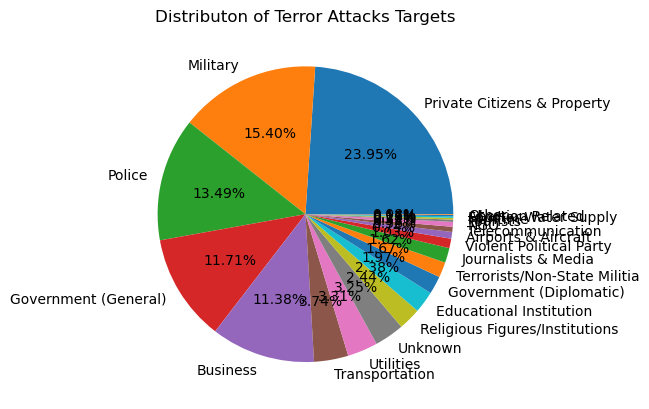

In [50]:
plt.pie(x = df['TARGET TYPE'].value_counts() , labels = df['TARGET TYPE'].value_counts().index,
       autopct='%0.2f%%')
plt.title('Distributon of Terror Attacks Targets')
plt.show()

Citizens and Properties are the most exposed targets to terror attacks

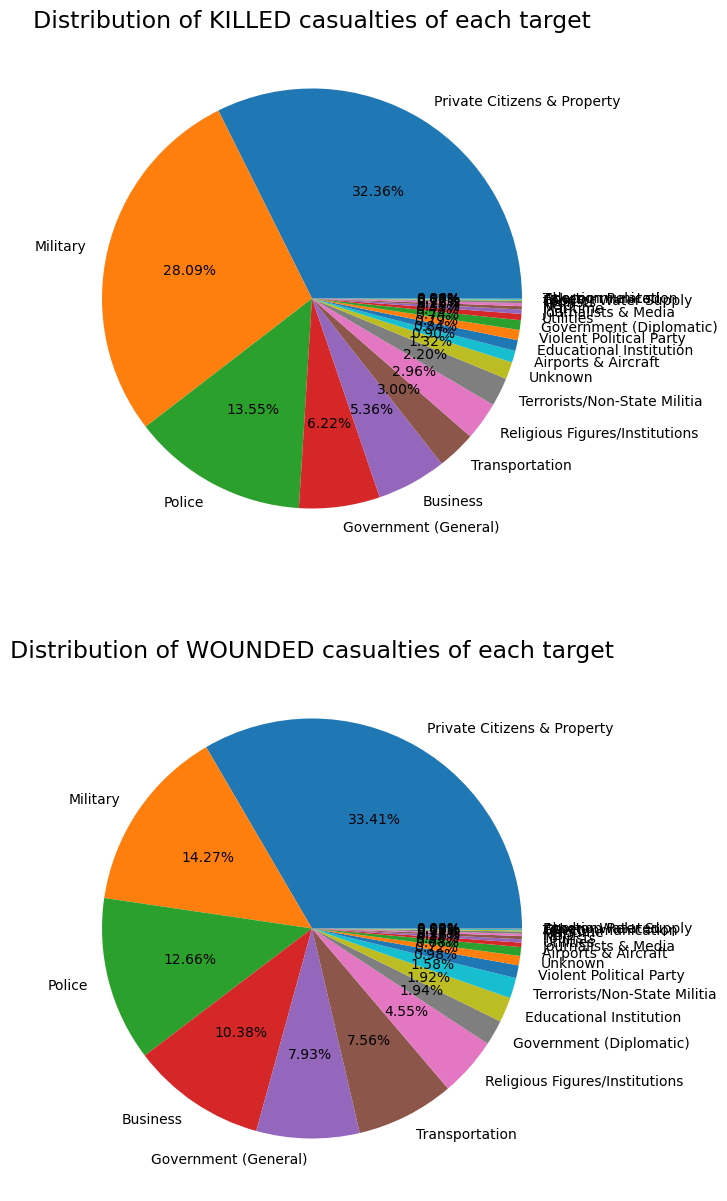

In [51]:
plt.figure(figsize=(15,15))
plot = 1
for i in ['KILLED' , 'WOUNDED'] :
    if plot <= 2:
        ax = plt.subplot(2,1,plot)
        dt = df.groupby('TARGET TYPE')[i].sum().sort_values(ascending = False).reset_index()
        plt.pie(x = dt[i] , labels = dt['TARGET TYPE'], autopct='%0.2f%%' , data = dt)
        plt.title('Distribution of {} casualties of each target'.format(i), fontsize = 17)
       
    plot += 1
    
plt.show()    

Citizens and Prperties are the most targeted casualties of terror attacks while military and police are in the next places respectively

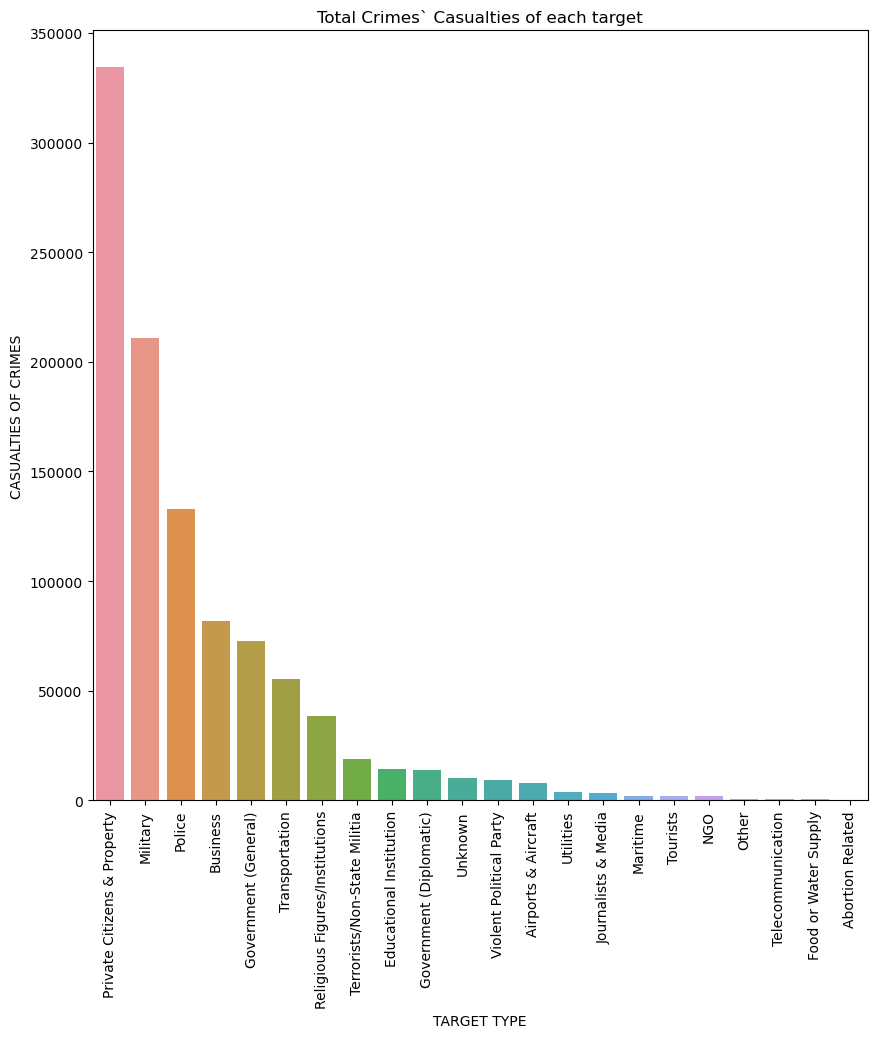

In [52]:
plt.figure(figsize=(10,10))
dt = df.groupby('TARGET TYPE')['CASUALTIES OF CRIMES'].sum().sort_values(ascending=False).reset_index()
sns.barplot( x = 'TARGET TYPE' ,y ='CASUALTIES OF CRIMES' , data = dt )
plt.title('Total Crimes` Casualties of each target')
plt.xticks(rotation = 90 , fontsize = 10)
plt.show()

Mst of recorded casualties of terror attack are civilians and properties while attacks related to abortion motivation recorded the lowest numbers

## Terrorist Groups 

In [53]:
df['GNAME'].value_counts()

Unknown                                             82782
Taliban                                              7478
Islamic State of Iraq and the Levant (ISIL)          5613
Shining Path (SL)                                    4555
Farabundo Marti National Liberation Front (FMLN)     3351
                                                    ...  
Ansar Sarallah                                          1
Sword of Islam                                          1
Support of Ocalan-The Hawks of Thrace                   1
Arab Revolutionary Front                                1
MANO-D                                                  1
Name: GNAME, Length: 3537, dtype: int64

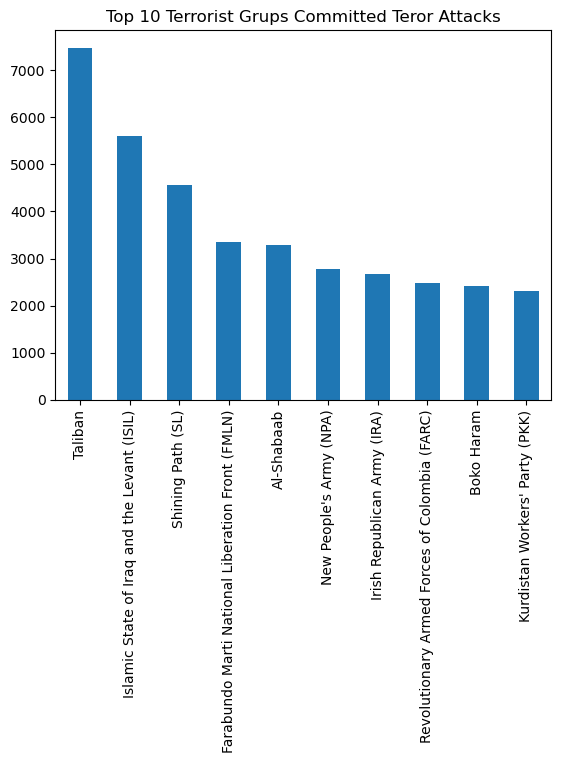

In [54]:
dt = df['GNAME'].value_counts()[1:11]
dt.plot(kind='bar')
plt.title('Top 10 Terrorist Grups Committed Teror Attacks')
plt.show()

Taliban committed most of terror attacks in the last five decades

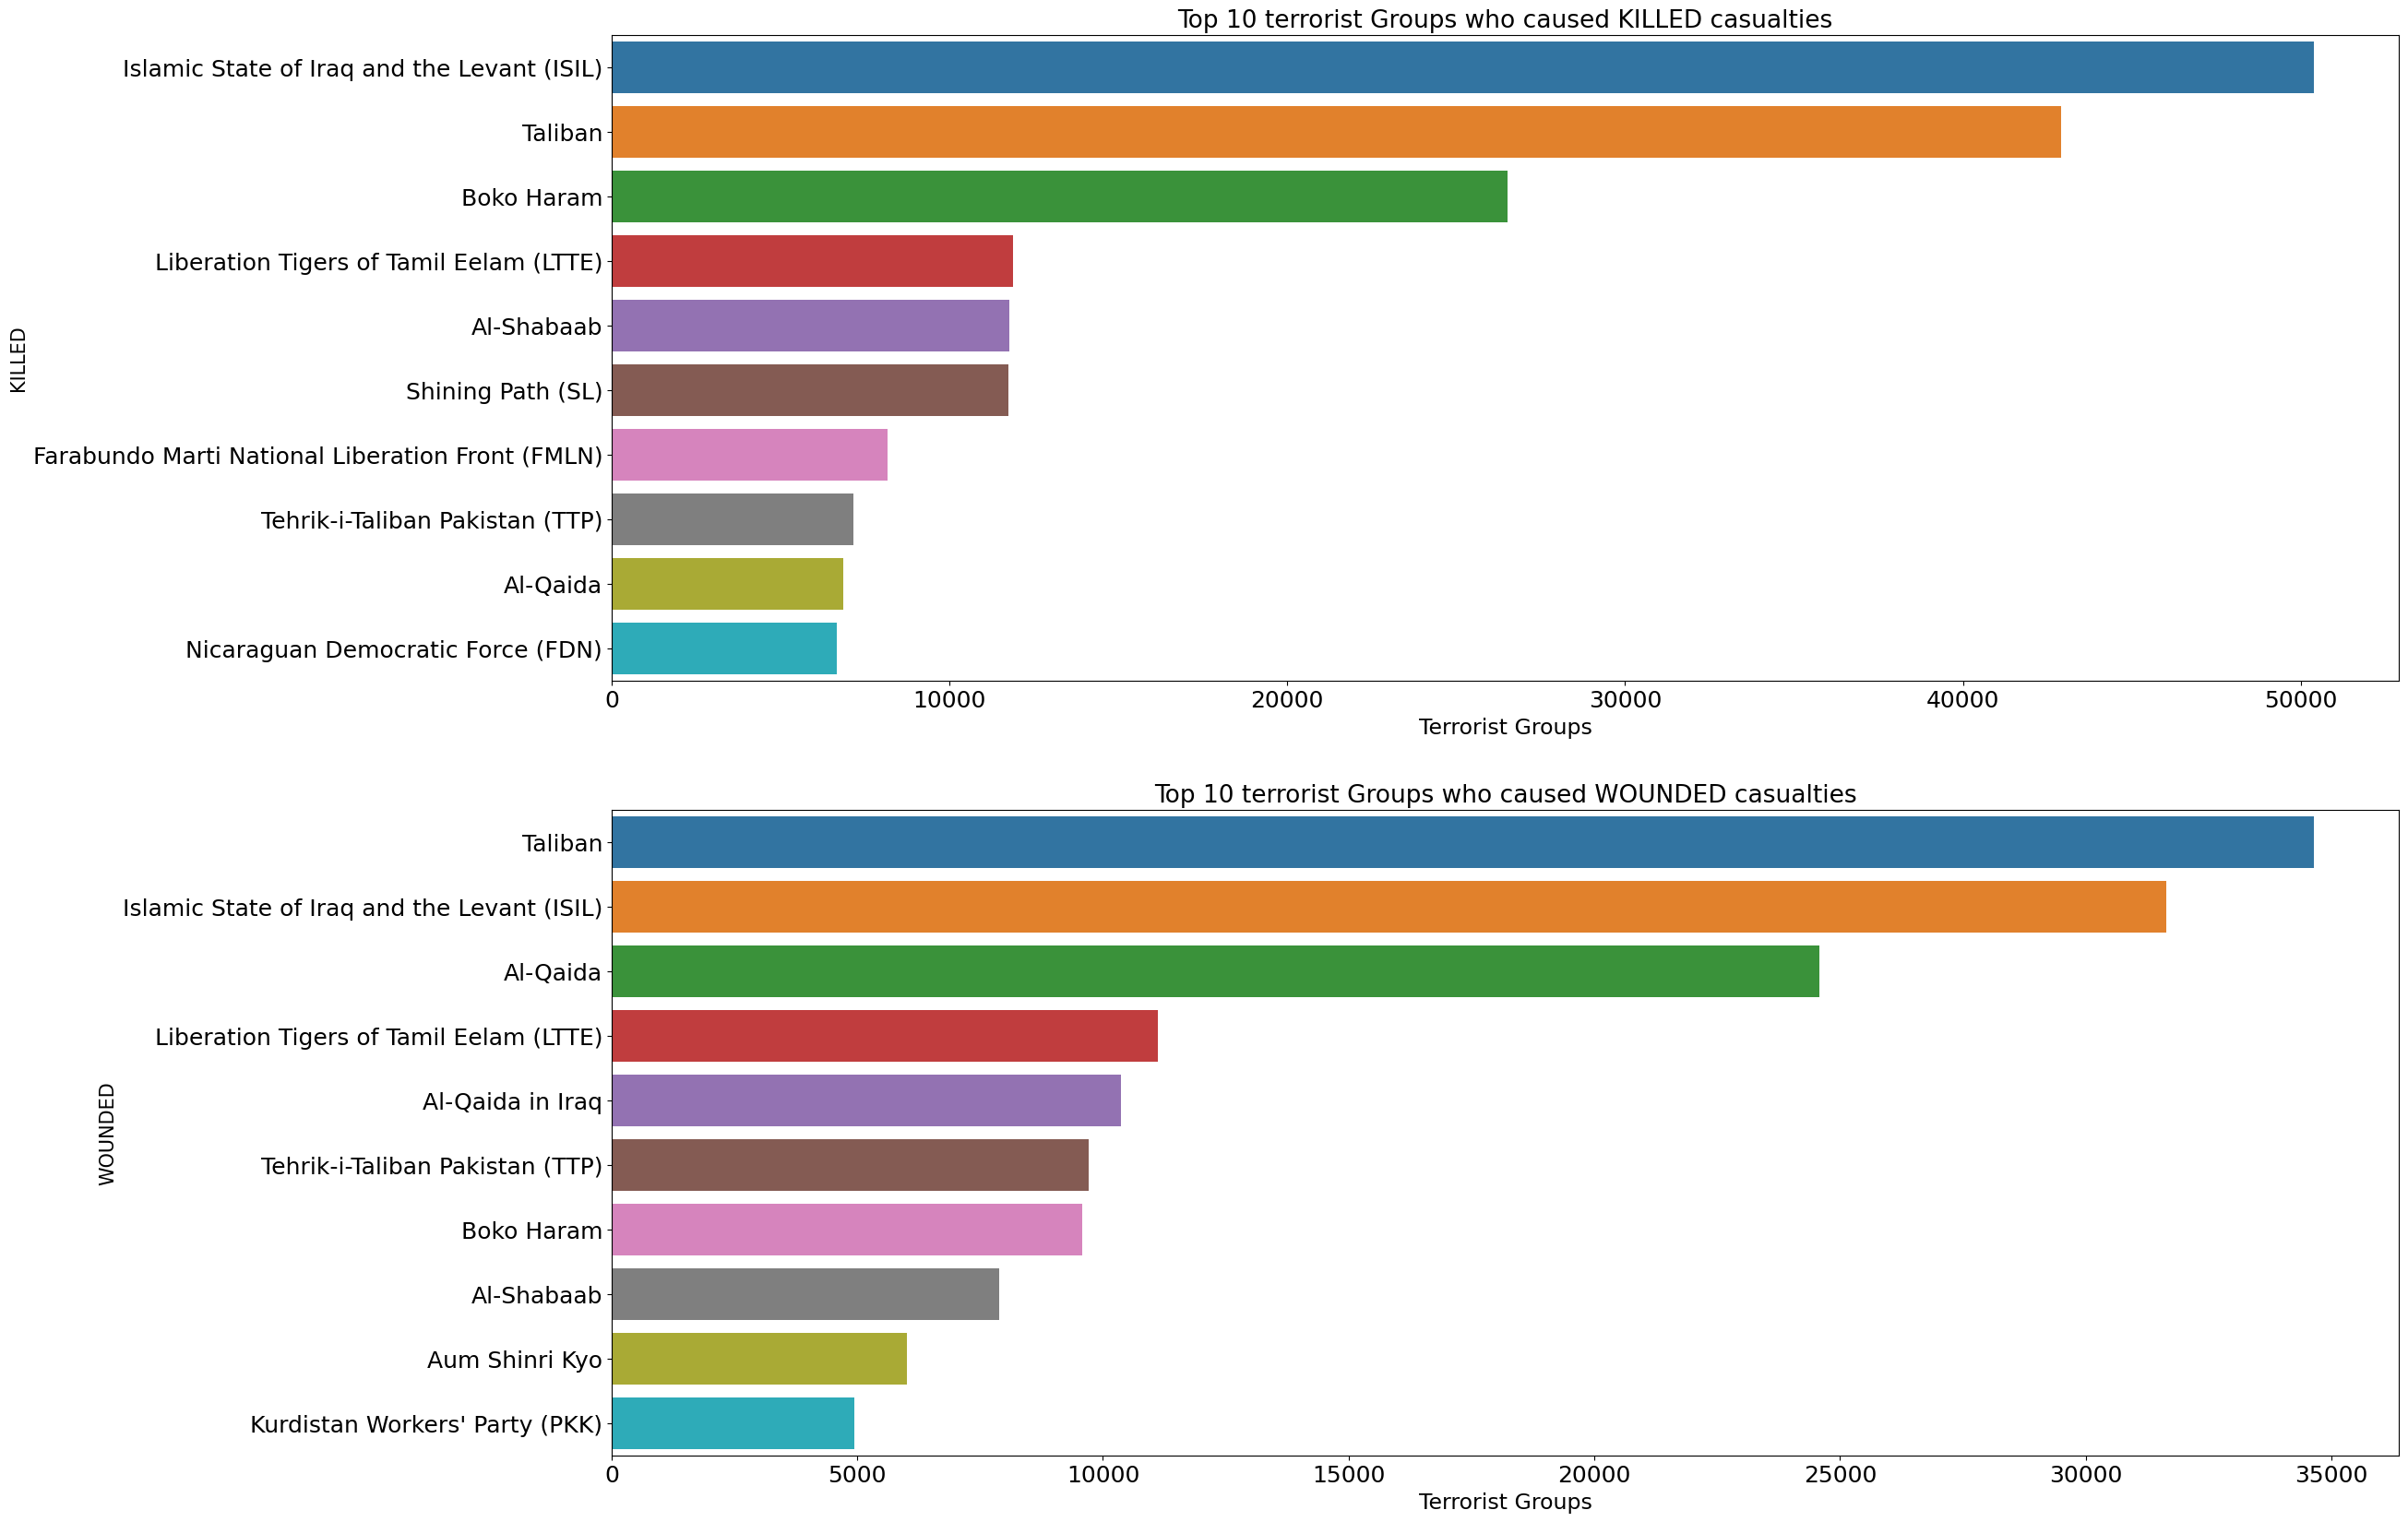

In [55]:
plt.figure(figsize=(25,20))
plot = 1
for i in ['KILLED' , 'WOUNDED'] :
    if plot <= 2:
        ax = plt.subplot(2,1,plot)
        dt = df.groupby('GNAME')[i].sum().sort_values(ascending = False).reset_index()[1:11]
        sns.barplot(x = dt[i] , y = dt['GNAME'])
        plt.title('Top 10 terrorist Groups who caused {} casualties'.format(i), fontsize = 19)
        plt.xlabel('Terrorist Groups' , fontsize = 17)
        plt.ylabel(i , fontsize=15)
        plt.xticks(fontsize= 18)
        plt.yticks(fontsize=18)
    plot += 1
    
plt.show()    

- Islamic State of Iraq and the Levant killed most of casualties in terror attacks
- Taliban's attacks caused the highest numbers of woundeds casuakties among all activist terrorist groups

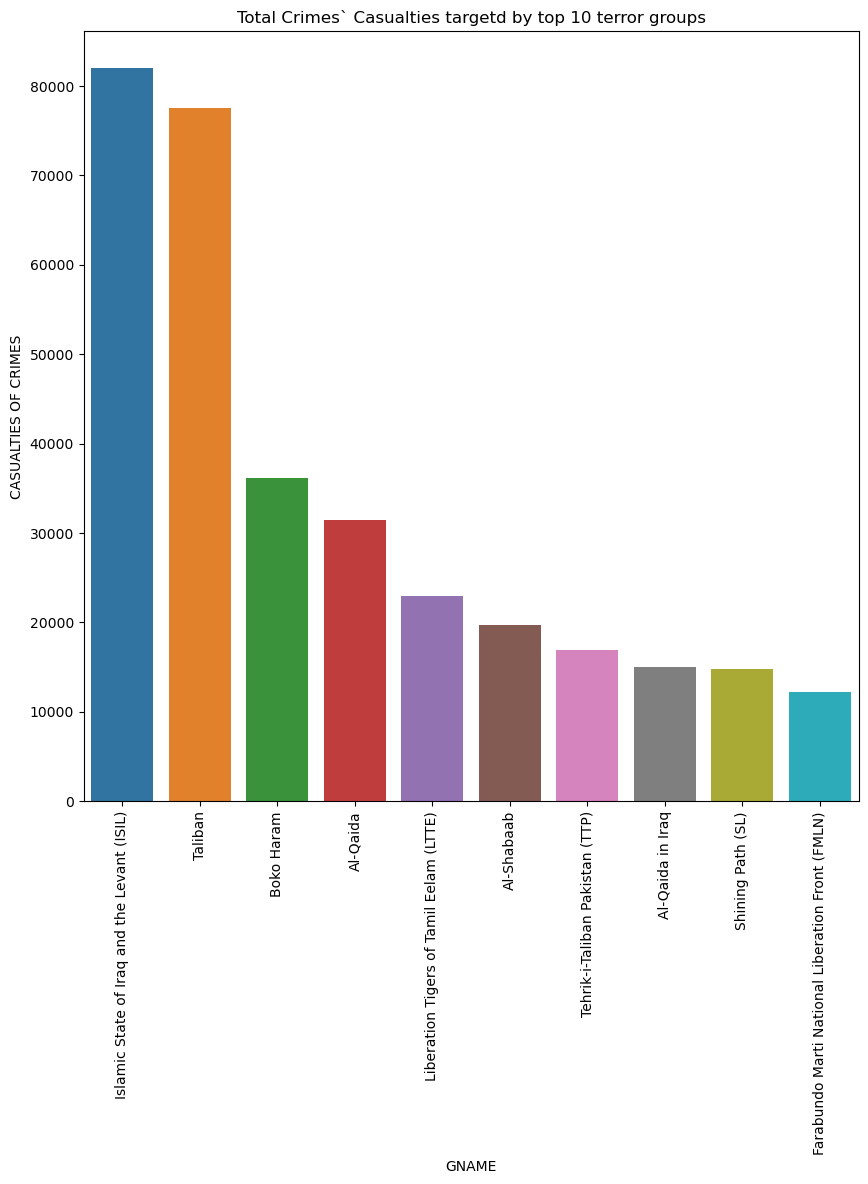

In [56]:
plt.figure(figsize=(10,10))
dt = df.groupby('GNAME')['CASUALTIES OF CRIMES'].sum().sort_values(ascending=False).reset_index()[1:11]
sns.barplot( x = 'GNAME' ,y ='CASUALTIES OF CRIMES' , data = dt )
plt.title('Total Crimes` Casualties targetd by top 10 terror groups')
plt.xticks(rotation = 90 , fontsize = 10)
plt.show()

Islamic State of Iraq and the Levant is the most dangerous terror group around the world

## Weapons Types 

In [57]:
df['WEAPON TYPE'].value_counts()

Explosives                                                                     92426
Firearms                                                                       58524
Unknown                                                                        15157
Incendiary                                                                     11135
Melee                                                                           3655
Chemical                                                                         321
Sabotage Equipment                                                               141
Vehicle (not to include vehicle-borne explosives, i.e., car or truck bombs)      136
Other                                                                            114
Biological                                                                        35
Fake Weapons                                                                      33
Radiological                                                     

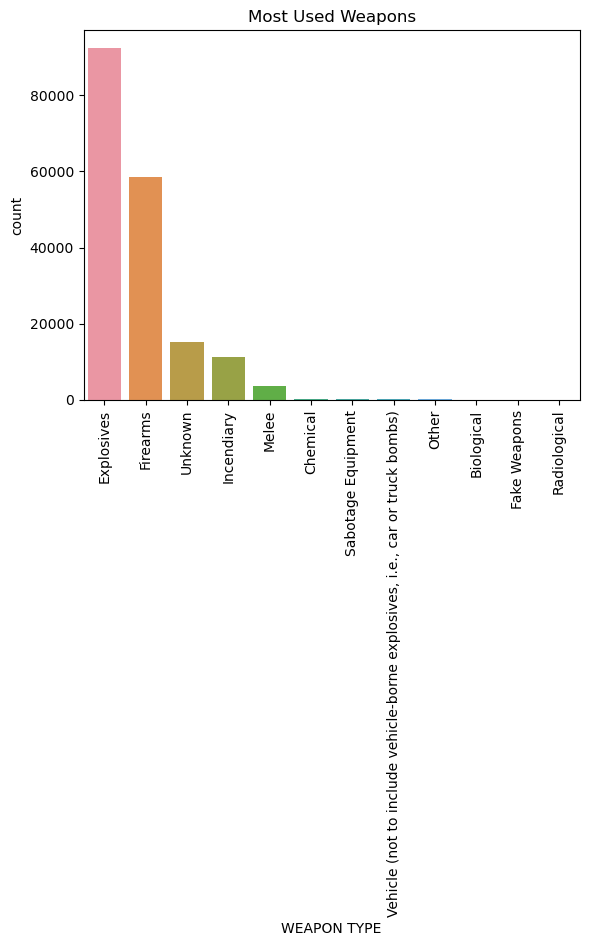

In [58]:
sns.countplot(x= df['WEAPON TYPE'] , order = df['WEAPON TYPE'].value_counts().index)
plt.title('Most Used Weapons')
plt.xticks(rotation = 90)
plt.show()

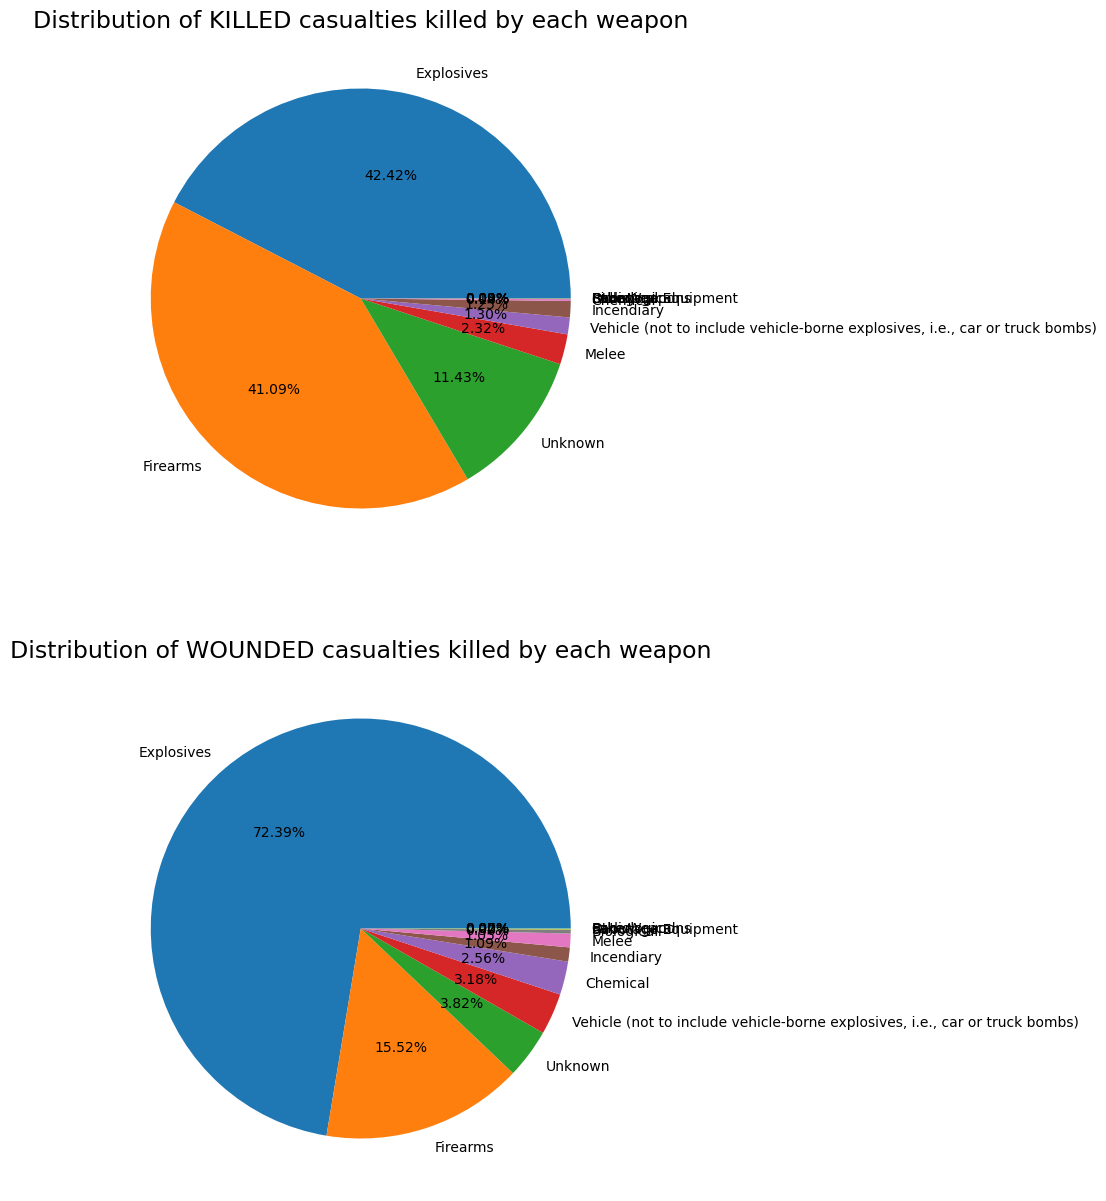

In [59]:
plt.figure(figsize=(15,15))
plot = 1
for i in ['KILLED' , 'WOUNDED'] :
    if plot <= 2:
        ax = plt.subplot(2,1,plot)
        dt = df.groupby('WEAPON TYPE')[i].sum().sort_values(ascending = False).reset_index()
        plt.pie(x = dt[i] , labels = dt['WEAPON TYPE'], autopct='%0.2f%%' , data = dt)
        plt.title('Distribution of {} casualties killed by each weapon'.format(i), fontsize = 17)
       
    plot += 1
    
plt.show()    

- Most of killed casuakties were murdered by explosive weapons
- More than half of wounded casualties were wounded by explosive weapons

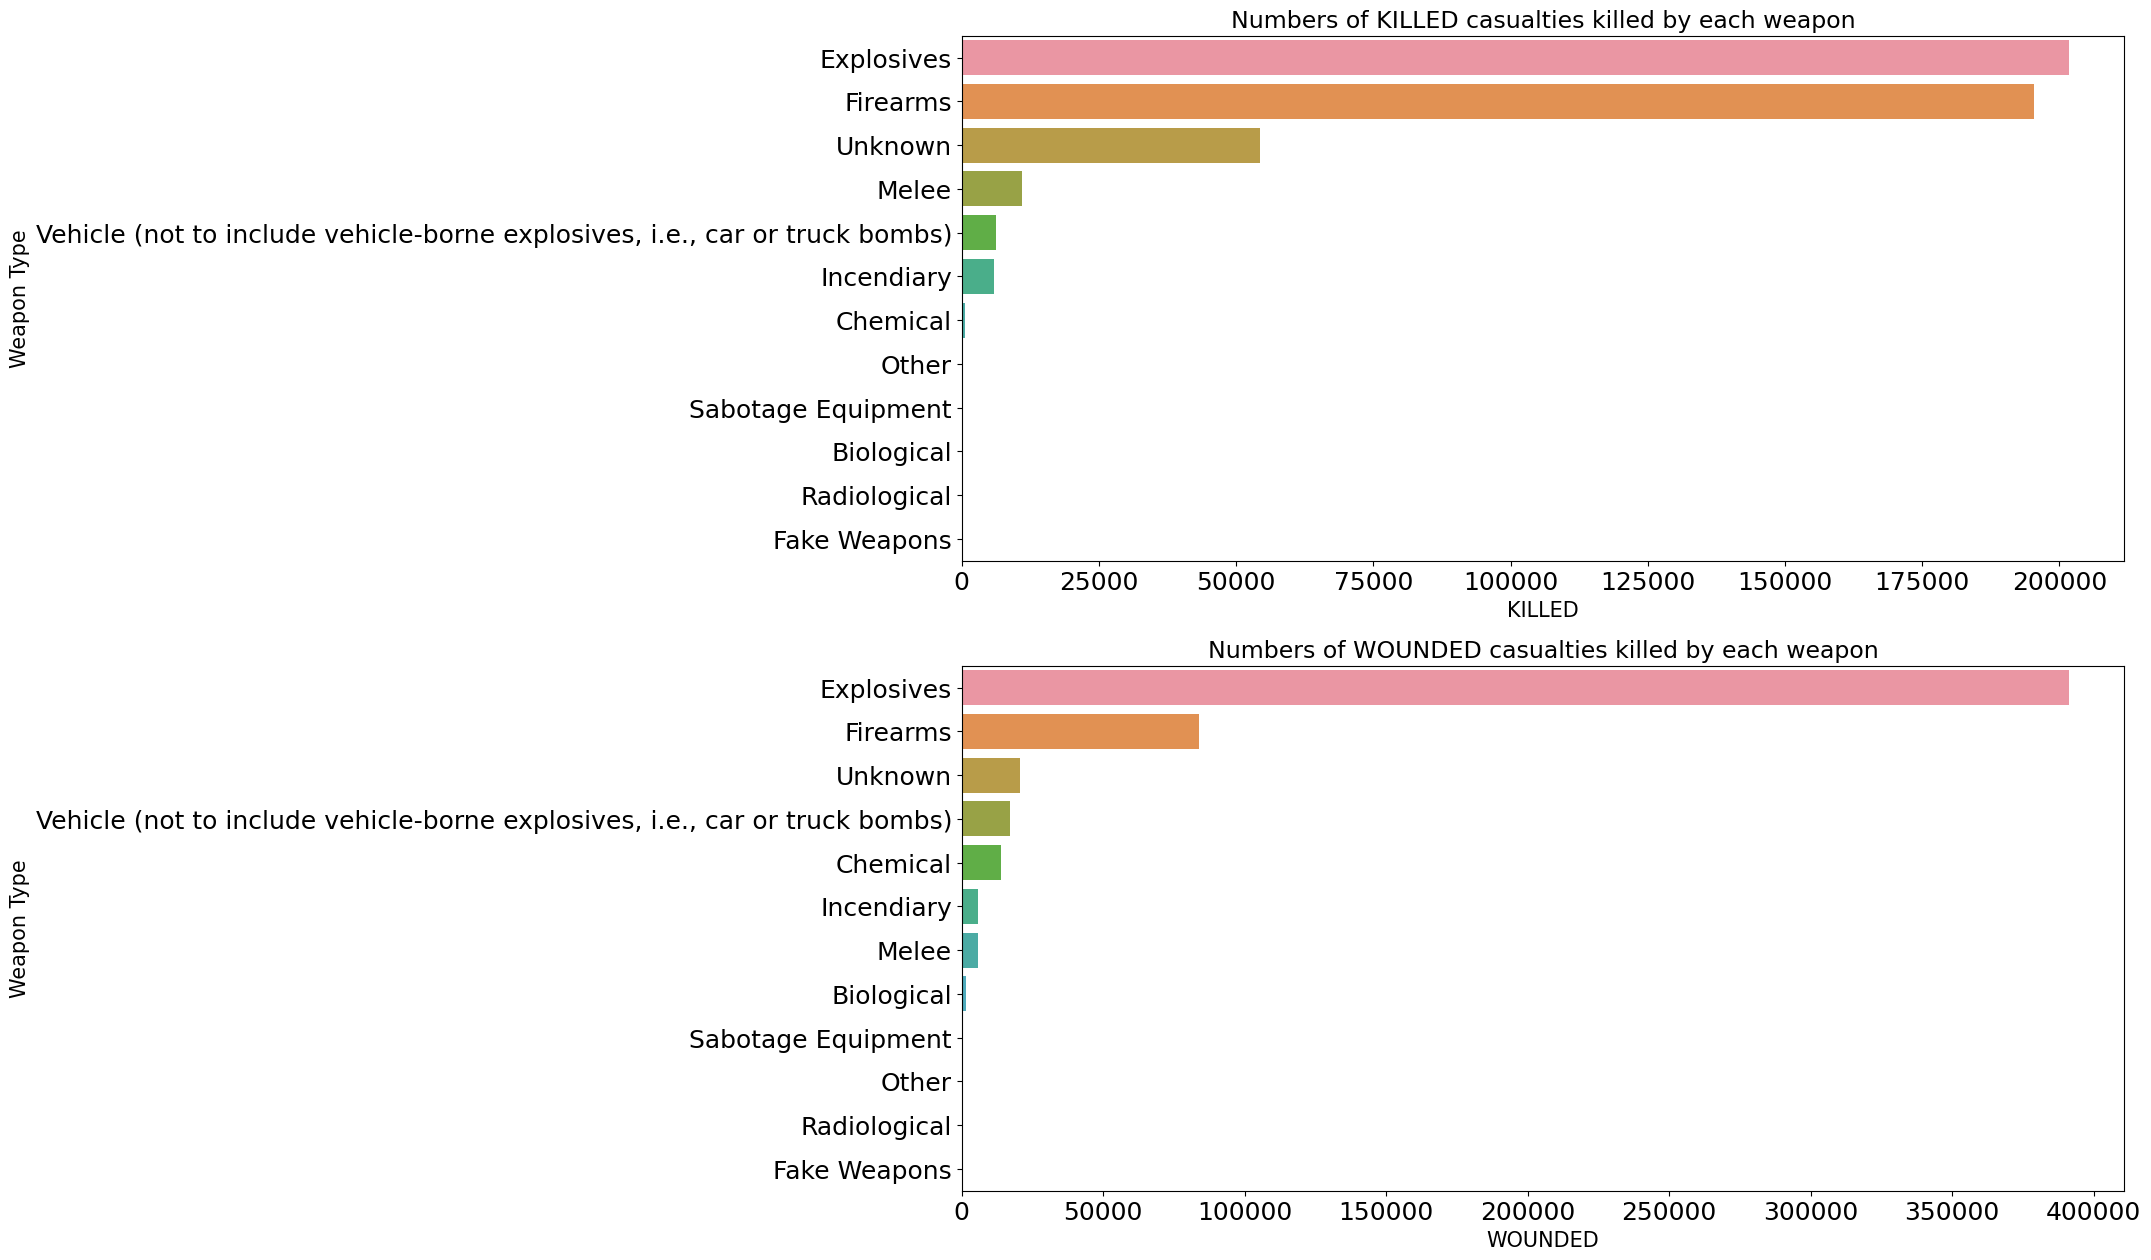

In [60]:
plt.figure(figsize=(15,15))
plot = 1
for i in ['KILLED' , 'WOUNDED'] :
    if plot <= 2:
        ax = plt.subplot(2,1,plot)
        dt = df.groupby('WEAPON TYPE')[i].sum().sort_values(ascending = False).reset_index()
        sns.barplot(x=dt[i] , y = dt['WEAPON TYPE'] )
        plt.title('Numbers of {} casualties killed by each weapon'.format(i), fontsize = 17)
        plt.xlabel(i , fontsize=15)
        plt.ylabel('Weapon Type' , fontsize=15)
        plt.xticks(fontsize=18)
        plt.yticks(fontsize=18)
    plot+= 1
plt.show()    

- Explosive weapons are the most dangerous weapons that killed and wounded people while Firearms are in the second place
- Fake weapons and Radiological weapons are the least used types in terror attacks

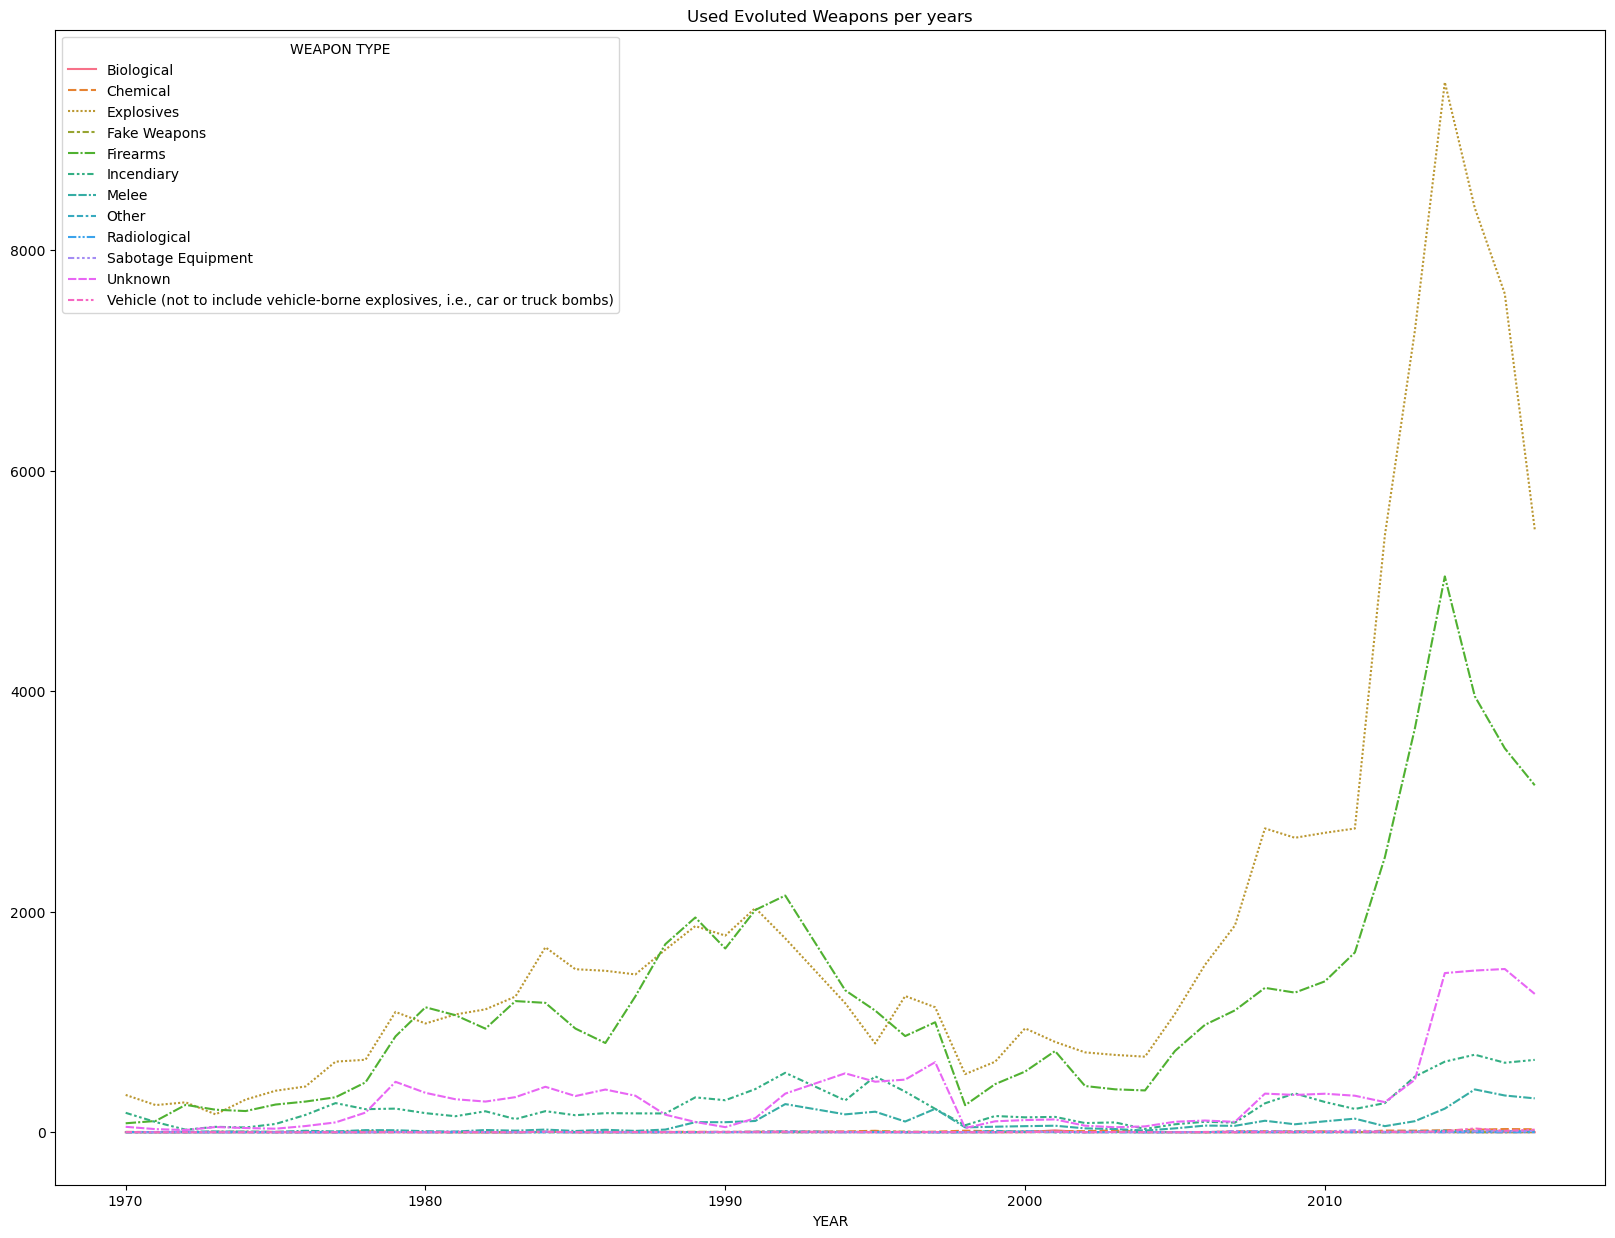

In [61]:
plt.figure(figsize=(20,15))
dt = pd.crosstab(df['YEAR'],df['WEAPON TYPE'])
sns.lineplot(data = dt)
plt.title('Used Evoluted Weapons per years')
plt.show()

- Explosive Weapons are being evoluted every year and highly used in terror attacks more than any other weapons
- Radiological and Biological weapons are the lowest used weapons in the last half century
- Incendiaries were increasingly used in 90s and were decreasing in the new century

## The undercontrolled ratio of accidents 

In [62]:
df['EXTENDED'].value_counts()

0    173452
1      8239
Name: EXTENDED, dtype: int64

We need to replace the integer values with well explaining labels

In [63]:
df['EXTENDED'] = df['EXTENDED'].replace({0:'Not Controlled in next hours' , 1: 'Controlled in next hours'})

In [64]:
# now let us check the new parameters
df['EXTENDED'].value_counts()

Not Controlled in next hours    173452
Controlled in next hours          8239
Name: EXTENDED, dtype: int64

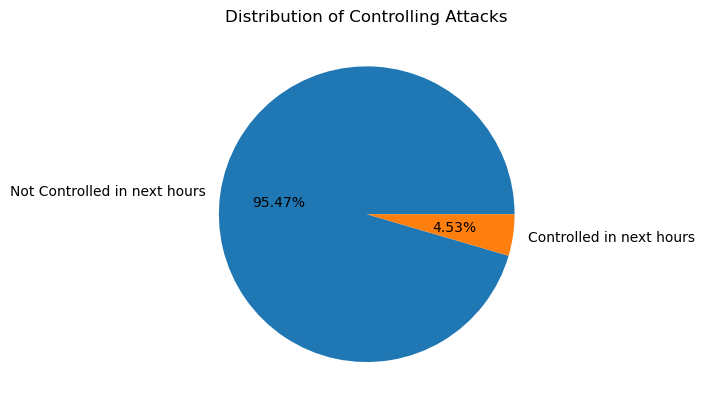

In [65]:
plt.pie(x = df['EXTENDED'].value_counts() ,
       labels = df['EXTENDED'].value_counts().index  , autopct='%0.2f%%')
plt.title('Distribution of Controlling Attacks')
plt.show()

The vast majority of terror attacks by percentage of 95.47 % are not controlled by authorities in the next hours after they happened which indicates to the lack of efficincy in authorities around the world in handling terror activities and give us a hint that terror attacks are the most dangerous crimes that face any state

## Kidnapped Hostages 

In [66]:
df['HOSTAGES KIDNAPED'].value_counts()

 0.0    167802
 1.0     13572
-9.0       317
Name: HOSTAGES KIDNAPED, dtype: int64

We can not extrct known insights from these values so we have to replace them with indicatrs to have insightful results

In [67]:
df['HOSTAGES KIDNAPED'] = df['HOSTAGES KIDNAPED'].replace({0:'No involved hostages' ,
                                                          1 : 'involoved hostages' ,
                                                          -9 : 'Not detected'})

In [68]:
df['HOSTAGES KIDNAPED'].value_counts()

No involved hostages    167802
involoved hostages       13572
Not detected               317
Name: HOSTAGES KIDNAPED, dtype: int64

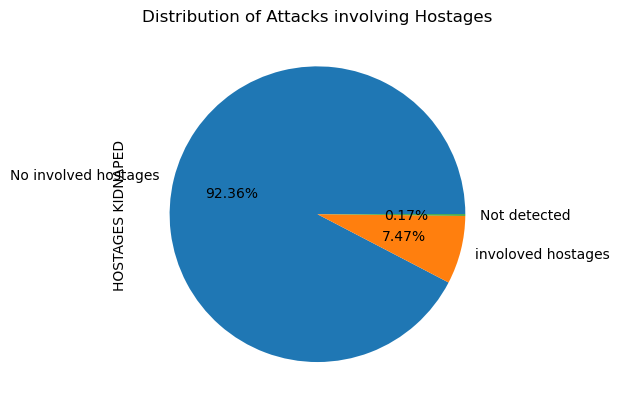

In [69]:
df['HOSTAGES KIDNAPED'].value_counts().plot( kind = 'pie', autopct='%0.2f%%')
plt.title('Distribution of Attacks involving Hostages')
plt.show()

The vast majority of terror attacks by 92.36 % do not involve hostages

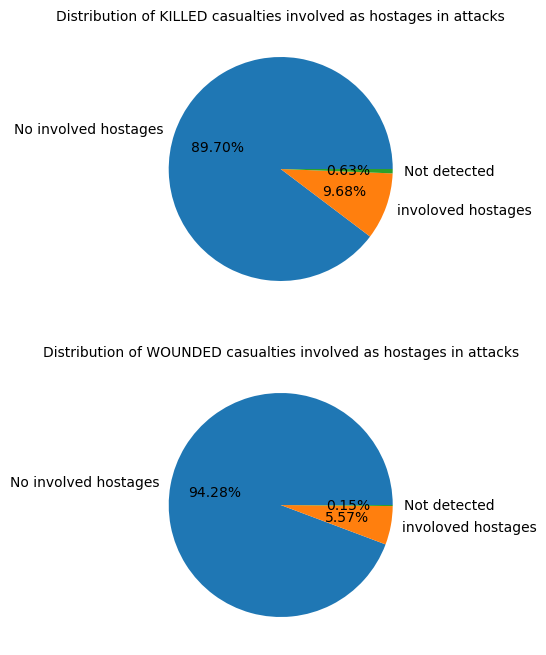

In [70]:
plt.figure(figsize=(15,8))
plot = 1
for i in ['KILLED' , 'WOUNDED'] :
    if plot <= 2:
        ax = plt.subplot(2,1,plot)
        dt = df.groupby('HOSTAGES KIDNAPED')[i].sum().sort_values(ascending = False).reset_index()
        plt.pie(x = dt[i] , labels = dt['HOSTAGES KIDNAPED'], autopct='%0.2f%%' , data = dt)
        plt.title('Distribution of {} casualties involved as hostages in attacks'.format(i), fontsize = 10)
       
    plot += 1
    
plt.show()    

- 9.68 % of detained hostages in terror attacks were killed
- 5.57 % of detained hostages in terror attacks were wounded
- The majority of terror attacks were not targeting having hostages and the majority of casualties were not hostages either killed or wounded

## Claimed Attacks 

In [71]:
df['CLAIMED'].value_counts()

 0.0    161211
 1.0     19006
-9.0      1474
Name: CLAIMED, dtype: int64

In [72]:
df['CLAIMED'] = df['CLAIMED'].replace({0:'Did NOT happen' ,
                                                          1 : 'Happened' ,
                                                          -9 : 'Not detected'})

In [73]:
df['CLAIMED'].value_counts()

Did NOT happen    161211
Happened           19006
Not detected        1474
Name: CLAIMED, dtype: int64

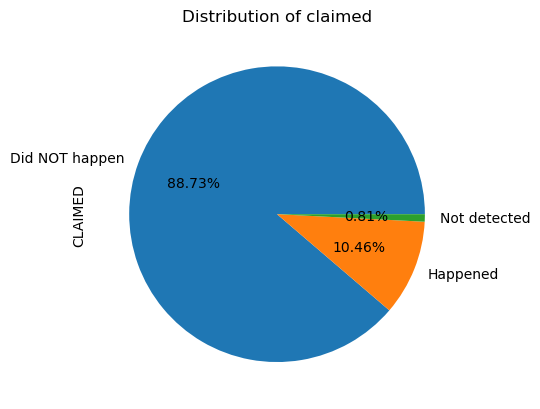

In [74]:
df['CLAIMED'].value_counts().plot( kind = 'pie', autopct='%0.2f%%')
plt.title('Distribution of claimed')
plt.show()

The vast majority of fake claimed reported attacks by percentage of 88.73 % did not happen actually 